# ***Water Quality Analysis Using Machine Learning***

---

## ***Introduction***

---

By [Darly Guntur Darris Purba](https://github.com/DarlyP)

![Data Science](water.jpg)

Link Data : [Water Quality](https://www.kaggle.com/datasets/mssmartypants/water-quality)

Link Deployment : [HuggingFace](https://huggingface.co/spaces/darly9991/Credit_Card_Default)

---

## **Objektif**

---

Dalam rangka meningkatkan kualitas air dan mendukung pertumbuhan perusahaan secara berkelanjutan, diadakan upaya untuk mengidentifikasi, menganalisis, dan mengatasi pencemaran air. Dengan pendekatan berbasis data, fokus terletak pada menghasilkan solusi yang tidak hanya menguntungkan perusahaan, tetapi juga memberikan dampak positif yang signifikan pada kesehatan masyarakat dan kelestarian lingkungan. Dengan upaya holistik dan strategis, tujuannya adalah membentuk masa depan yang lebih bersih dan lebih berkelanjutan bagi semua pihak yang terlibat.

---

## **Identifikasi Masalah** 

---

Kolom | Keterangan
--- | ---
Specific | Mengidentifikasi dan mengurangi konsentrasi kontaminan utama dalam air 
Measurable | Menurunkan konsentrasi kontaminan hingga di bawah batas aman yang telah ditetapkan dalam waktu satu tahun, dengan pengukuran bulanan untuk memantau kemajuan.
Achievable | Mengimplementasikan algoritma prediktif dan teknik *machine learning* untuk memantau dan mengoptimalkan proses pengolahan air guna mencapai standar kualitas air yang diinginkan.
Relevant | Meningkatkan kualitas air untuk mendukung kesehatan masyarakat dan memenuhi regulasi lingkungan, yang juga meningkatkan reputasi perusahaan sebagai pelopor keberlanjutan.
Time-bound | Mencapai target penurunan konsentrasi kontaminan dalam waktu 12 bulan dengan evaluasi hasil setiap tiga bulan untuk memastikan perbaikan berkelanjutan.


Mengidentifikasi dan mengurangi konsentrasi kontaminan utama dalam air dengan mengimplementasikan algoritma prediktif dan teknik *machine learning* untuk memantau dan mengoptimalkan proses pengolahan air guna mencapai standar kualitas air yang diinginkan, dengan target menurunkan konsentrasi hingga di bawah batas aman dalam waktu satu tahun, mendukung kesehatan masyarakat dan regulasi lingkungan, serta memastikan perbaikan berkelanjutan dengan evaluasi setiap tiga bulan.


---

## ***Import Libraries***

---

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json
from feature_engine.outliers import Winsorizer
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

---

## ***Data Loading***

---

In [2]:
# Membuka Data CSV
df = pd.read_csv('waterQuality1.csv', na_values=['N/A', 'NA', 'NaN'], index_col=False)

In [3]:
# Menampilkan 10 Data Teratas
pd.options.display.max_columns = None
df.head(10)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,0.670,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1
6,2.36,5.6,0.01,1.35,0.004,1.28,0.62,1.88,0.33,0.13,0.007,0.021,18.60,1.78,0.007,45.34,2.84,0.10,0.24,0.08,0
7,3.93,19.87,0.04,0.66,0.001,6.22,0.10,1.86,0.86,0.16,0.005,0.197,13.65,1.81,0.001,53.35,7.24,0.08,0.08,0.07,0
8,0.60,24.58,0.01,0.71,0.005,3.14,0.77,1.45,0.98,0.35,0.002,0.167,14.66,1.84,0.004,23.43,4.99,0.08,0.25,0.08,1
9,0.22,16.76,0.02,1.37,0.007,6.40,0.49,0.82,1.24,0.83,0.830,0.109,4.79,1.46,0.010,30.42,0.08,0.03,0.31,0.01,1


In [4]:
# Menampilkan 10 Data Terbawah
df.tail(10)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7989,0.01,27.73,0.06,0.77,0.09,0.20,0.03,0.00,0.58,0.0,0.0,0.112,11.74,1.0,0.007,7.58,7.21,0.07,0.04,0.09,0
7990,0.00,3.11,0.07,1.24,0.07,0.06,0.03,0.04,0.74,0.0,0.0,0.016,15.15,1.0,0.005,0.46,6.24,0.03,0.09,0.05,0
7991,0.03,8.94,0.02,1.25,0.08,0.22,0.02,0.05,0.71,0.0,0.0,0.112,11.97,1.0,0.001,7.18,1.73,0.00,0.04,0.06,1
7992,0.04,10.84,0.06,0.49,0.04,0.08,0.03,0.08,0.49,0.0,0.0,0.151,14.44,1.0,0.003,0.34,2.16,0.06,0.03,0.05,1
7993,0.02,5.24,0.05,0.77,0.02,0.57,0.04,0.03,0.15,0.0,0.0,0.085,19.41,1.0,0.001,1.68,3.55,0.05,0.07,0.07,1
7994,0.05,7.78,0.00,1.95,0.04,0.10,0.03,0.03,1.37,0.0,0.0,0.197,14.29,1.0,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.01,0.45,0.02,0.02,1.48,0.0,0.0,0.031,10.27,1.0,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.03,0.05,0.05,0.02,0.91,0.0,0.0,0.182,15.92,1.0,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.00,2.00,0.00,0.09,0.00,0.0,0.0,0.000,0.00,0.0,0.000,0.00,0.00,0.00,0.00,0.00,1
7998,0.04,6.85,0.01,0.70,0.03,0.05,0.01,0.03,1.00,0.0,0.0,0.182,15.92,1.0,0.000,1.35,4.84,0.00,0.04,0.05,1


In [5]:
# Menampilan Data Pada Rentang Tertentu 
df.iloc[100:115]

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
100,3.03,9.19,0.050,0.65,0.006,6.25,0.61,0.77,0.76,0.51,0.510,0.086,10.31,1.17,0.000,31.57,6.36,0.02,0.17,0.08,1
101,2.22,29.68,0.030,2.86,0.006,4.54,0.72,0.14,1.42,1.00,1.000,0.082,11.30,1.46,0.006,33.09,4.96,0.00,0.16,0.05,0
102,4.91,18.02,0.040,0.13,0.005,5.22,0.84,0.62,0.97,0.23,0.006,0.120,8.90,1.30,0.003,6.87,5.77,0.01,0.03,0.07,1
103,1.15,20.06,0.020,2.73,0.005,1.86,0.81,0.36,0.73,0.47,0.000,0.003,14.01,1.36,0.005,10.62,4.48,0.03,0.38,0.02,1
104,4.80,11.92,0.050,3.20,0.006,7.37,0.46,1.43,1.49,0.58,0.580,0.160,6.03,1.25,0.000,33.02,6.74,0.00,0.42,0.00,1
105,0.47,26.77,0.020,0.29,0.006,7.36,0.15,1.65,0.08,0.51,0.510,0.025,13.73,1.53,0.002,30.29,4.41,0.08,0.34,0.06,0
106,1.62,6.54,0.010,1.46,0.001,3.07,0.11,0.05,1.21,0.33,0.001,0.015,1.72,1.02,0.001,3.47,6.28,0.09,0.47,0.01,1
107,2.68,9.61,0.020,1.32,0.007,2.89,0.69,0.16,0.87,0.67,0.670,0.180,11.22,1.65,0.003,28.47,7.28,0.07,0.12,0.01,1
108,0.09,12.26,0.040,3.61,0.001,3.58,0.47,0.13,1.29,0.82,0.820,0.072,12.75,1.37,0.006,32.48,1.45,0.02,0.31,0.04,1
109,4.66,0.27,0.040,0.16,0.001,6.75,0.09,1.72,0.89,0.09,0.005,0.184,10.20,1.47,0.001,25.77,5.26,0.00,0.10,0.08,1


In [6]:
# Menampilkan Kolom pada Data
df.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [7]:
# Menampilkan Jumlah Baris dan Kolom
df.shape

(7999, 21)

In [8]:
# Menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [9]:
# Menampilkan Niilai Unik
unique_values = df['ammonia'].unique()

# Define Chunk Size
chunk_size = 10

# Menampilkan Nilai Unik Setiap Chunk
for i in range(0, len(unique_values), chunk_size):
    print(unique_values[i:i+chunk_size])

['9.08' '21.16' '14.02' '11.33' '24.33' '14.47' '5.6' '19.87' '24.58'
 '16.76']
['3.6' '21.96' '19.26' '23.98' '18.82' '2.41' '15.84' '17.03' '26.94'
 '17.99']
['18.99' '8.12' '10.67' '20.64' '27.05' '22.07' '6.81' '2.4' '15.14'
 '25.84']
['22.8' '6.1' '26.19' '15.75' '29.29' '4.07' '23.19' '26.85' '13.08'
 '19.9']
['9.49' '22.32' '1.07' '28.19' '13.74' '0.14' '28.84' '10.83' '9.02'
 '0.44']
['23.16' '20.81' '18.64' '10.15' '8.63' '3.53' '21.24' '3.22' '12.4'
 '2.21']
['29.19' '13.59' '3.14' '3.82' '21.08' '19.96' '12.28' '22.33' '8.7'
 '10.59']
['8.83' '13.84' '28.55' '18.97' '19.42' '8.17' '16.66' '14.14' '27.89'
 '18.79']
['14.79' '9.33' '28.29' '25.95' '10.38' '22.51' '9.32' '15.62' '15.42'
 '17.69']
['21.84' '2.84' '22.84' '4.15' '13.55' '19.11' '23.02' '13.18' '11.12'
 '9.19']
['29.68' '18.02' '20.06' '11.92' '26.77' '6.54' '9.61' '12.26' '0.27'
 '14.81']
['16.6' '10.25' '2.07' '19.07' '19.17' '9.2' '5.19' '16.35' '2.01' '5.43']
['22.29' '29.72' '25.2' '19.73' '23.18' '23.58' '23

In [10]:
# Menghitung Persentase Kemunculan Nilai '#NUM!' di Setiap Kolom
percentage_num = (df == '#NUM!').mean() * 100

# Menghitung Jumlah Total Kemunculan Nilai '#NUM!' di Setiap Kolom
count_num = (df == '#NUM!').sum()

# Menggabungkan Hasil
result = pd.concat([percentage_num, count_num], axis=1)
result.columns = ['Percentage', 'Count']

print(result)

             Percentage  Count
aluminium      0.000000      0
ammonia        0.037505      3
arsenic        0.000000      0
barium         0.000000      0
cadmium        0.000000      0
chloramine     0.000000      0
chromium       0.000000      0
copper         0.000000      0
flouride       0.000000      0
bacteria       0.000000      0
viruses        0.000000      0
lead           0.000000      0
nitrates       0.000000      0
nitrites       0.000000      0
mercury        0.000000      0
perchlorate    0.000000      0
radium         0.000000      0
selenium       0.000000      0
silver         0.000000      0
uranium        0.000000      0
is_safe        0.037505      3


In [11]:
# Menampilkan Nilai Ammonia
df[df['ammonia'] == '#NUM!']

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7551,0.03,#NUM!,0.08,0.79,0.07,0.08,0.05,0.58,0.34,0.00,0.0,0.183,4.37,1.43,0.007,0.62,2.54,0.07,0.05,0.05,#NUM!
7568,0.06,#NUM!,0.07,1.72,0.08,0.32,0.01,1.11,0.61,0.00,0.0,0.178,12.10,2.03,0.008,1.37,2.05,0.06,0.10,0.07,#NUM!
7890,0.01,#NUM!,0.08,0.49,0.00,0.07,0.09,0.06,0.72,0.57,0.0,0.088,9.57,1.45,0.009,7.67,7.70,0.03,0.05,0.02,#NUM!


In [12]:
# Menampilkan Nilai Missing Value
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [13]:
# Menampilkan Duplikat
df.duplicated().sum()

0

***Insight:***

Pada dataframe `waterQuality1.csv` dapat ditemukan:

- Terdapat 7999 baris dan 21 kolom 

- Ditemukan data kategorik pada data numerik, yaitu **#NUM!**, yang menandakan nilai *missing value* pada data. Data ini terletak pada kolom `ammonia` dan secara kebetulan juga berada pada kolom `is_safe`. Data kategorik ini akan dihapus karena cuma terdapat 3 data yang merupakan 0.0375 % dari total keseluruhan data. 

- Karena data tadi masih dalam bentuk kategorik, maka akan dilakukan pengubahan sehingga menjadi data  numerik

- Tidak ditemukan data yang mengalami duplikasi

- Keterangan masing- masing kolom bedasarkan informasi yang diberikan oleh penyedia data:

Kolom | Keterangan
--- | ---
Aluminium | Konsentrasi aluminium dalam air minum. Berbahaya jika melebihi 2.8 mg/L karena dapat terkait dengan gangguan saraf dan penyakit Alzheimer.
Ammonia | Konsentrasi ammonia dalam air minum. Berbahaya jika melebihi 32.5 mg/L karena dapat menyebabkan iritasi saluran pernapasan dan kerusakan paru-paru.
Arsenic | Konsentrasi arsenik dalam air minum. Berbahaya jika melebihi 0.01 mg/L karena dapat menyebabkan masalah kulit, pernapasan, dan meningkatkan risiko kanker.
Barium | Konsentrasi barium dalam air minum. Berbahaya jika melebihi 2 mg/L karena dapat menyebabkan gangguan kardiovaskular, ginjal, dan neurologis.
Cadmium | Konsentrasi kadmium dalam air minum. Berbahaya jika melebihi 0.005 mg/L karena dapat menyebabkan kerusakan ginjal, hati, dan meningkatkan risiko kanker.
Chloramine | Konsentrasi chloramine dalam air minum. Berbahaya jika melebihi 4 mg/L karena dapat menyebabkan iritasi kulit dan masalah pernapasan.
Chromium | Konsentrasi kromium dalam air minum. Berbahaya jika melebihi 0.1 mg/L karena dapat terkait dengan masalah kesehatan seperti iritasi kulit dan masalah pernapasan.
Copper | Konsentrasi tembaga dalam air minum. Berbahaya jika melebihi 1.3 mg/L karena dapat menyebabkan keracunan tembaga yang dapat mengganggu fungsi hati dan ginjal.
Fluoride | Konsentrasi fluoride dalam air minum. Berbahaya jika melebihi 1.5 mg/L karena dapat menyebabkan masalah kesehatan gigi dan tulang.
Bakteri | Jumlah bakteri patogen dalam air minum. Berbahaya jika melebihi 0 karena dapat menyebabkan penyakit seperti diare dan infeksi saluran pernapasan.
Virus | Jumlah virus patogen dalam air minum. Berbahaya jika melebihi 0 karena dapat menyebabkan penyakit seperti gastroenteritis dan flu.
Timbal (Lead) | Konsentrasi timbal dalam air minum. Berbahaya jika melebihi 0.015 mg/L karena dapat menyebabkan kerusakan otak, ginjal, dan masalah perkembangan pada anak-anak.
Nitrat (Nitrates) | Konsentrasi nitrat dalam air minum. Berbahaya jika melebihi 10 mg/L karena dapat menyebabkan methemoglobinemia pada bayi.
Nitrit (Nitrites) | Konsentrasi nitrit dalam air minum. Berbahaya jika melebihi 1 mg/L karena dapat menyebabkan methemoglobinemia pada bayi.
Mercury (Mercury) | Konsentrasi merkuri dalam air minum. Berbahaya jika melebihi 0.002 mg/L karena dapat menyebabkan kerusakan neurologis dan ginjal.
Perklorat (Perchlorate) | Konsentrasi perklorat dalam air minum. Berbahaya jika melebihi 56 mg/L karena dapat mengganggu fungsi kelenjar tiroid.
Radium (Radium) | Konsentrasi radium dalam air minum. Berbahaya jika melebihi 5 pCi/L atau 185 Bq/L karena dapat meningkatkan risiko kanker.
Selenium | Konsentrasi selenium dalam air minum. Berbahaya jika melebihi 0.5 mg/L karena dapat menyebabkan kerusakan hati dan sistem saraf.
Silver (Silver) | Konsentrasi perak dalam air minum. Berbahaya jika melebihi 0.1 mg/L karena dapat menyebabkan argyria (perubahan warna kulit menjadi biru-keabu-abuan).
Uranium (Uranium) | Konsentrasi uranium dalam air minum. Berbahaya jika melebihi 0.3 mg/L karena dapat menyebabkan kerusakan ginjal dan meningkatkan risiko kanker.

---

## ***Exploratory Data Analysis***

---

### **Visualisasi Data**

---

#### **Fungsi Visualisasi Data**

---

In [14]:
# Fungsi EDA Untuk Membuat Scatterplot dengan Garis Korelasi
def scatterplot_with_regression(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y)
    sns.regplot(x=x, y=y, scatter=False, color='red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Contoh pemanggilan fungsi untuk setiap kolom data
# scatterplot_with_regression(df['nitrates'], df['nitrites'], 'Nitrat (mg/L)', 'Nitrit (mg/L)', 'Hubungan Antara Nitrat dan Nitrit')

In [15]:
# Fungsi EDA Untuk Menampilkan Histogram Boxplot
def histogram_boxplot(df_column, bins=20):
    # Buat palet warna acak
    random_palette = sns.color_palette("hsv", 2)
    
    # Contoh DataFrame
    # Misalkan 'df' adalah DataFrame yang telah terdefinisi sebelumnya

    fig, ax = plt.subplots(ncols=2, figsize=(10, 4))

    # Plot histogram dengan palet warna acak menggunakan seaborn
    sns.histplot(df_column, bins=bins, ax=ax[0], kde=True, color=random_palette[0])
    # Plot box plot dengan palet warna acak menggunakan seaborn
    sns.boxplot(x=df_column, ax=ax[1], color=random_palette[1])

    plt.show()

# # Contoh penggunaan fungsi
# histogram_boxplot(df['ammonia'])

***Insight:***

Dibentuklah suatu fungsi yang bertujuan untuk visualisasi data, yang mencakup scatterplot dilengkapi dengan garis regresi, serta histogram yang dipadukan dengan boxplot. Fungsi ini nantinya akan digunakan sebagai alat untuk mengamati dan menganalisis hubungan antara berbagai kolom dalam dataset yang ada. Dengan adanya visualisasi ini diharapkan dapat memberikan gambaran yang lebih jelas dan mendetail mengenai korelasi dan distribusi data, sehingga mempermudah proses interpretasi dan pengambilan keputusan berdasarkan data yang tersedia.

---


#### **Hubungan Nitrat dan Nitrit**

---

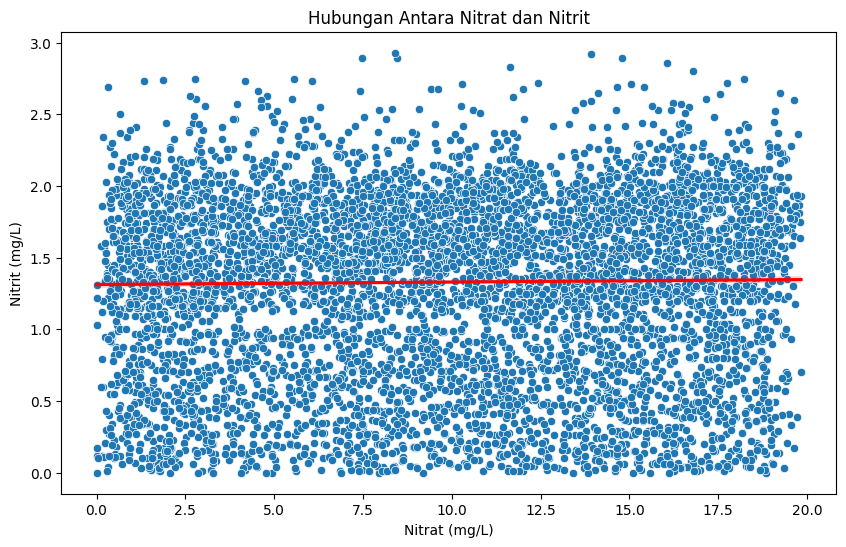

In [16]:
# Pemanggilan Fungsi Untuk Setiap Kolom Data
scatterplot_with_regression(df['nitrates'], df['nitrites'], 'Nitrat (mg/L)', 'Nitrit (mg/L)', 'Hubungan Antara Nitrat dan Nitrit')

***Insight:***

Nitrat (NO<sub>3</sub>) dan Nitrit (NO<sub>2</sub>) saling terkait dalam siklus nitrogen. Nitrat dapat diubah menjadi nitrit oleh bakteri melalui proses denitrifikasi. Dengan demikian, jika konsentrasi nitrat tinggi, ada kemungkinan konsentrasi nitrit juga bisa meningkat, tergantung pada kondisi mikrobiologis dalam air. Data menunjukkan grafik korelasi yang datar namun sedikit naik, ini mungkin menunjukkan adanya hubungan yang lemah namun positif antara konsentrasi nitrat dan nitrit dalam sampel air. Berikut adalah beberapa alasan mengapa grafik korelasi mungkin datar namun sedikit naik, menunjukkan hubungan yang lemah namun positif:

- Proses denitrifikasi yang tidak merata

- Kondisi lingkungan bakteri denitrifikasi tidak optimal

- Konsentrasi oksigen yang terlarut, suhu air, dan pH dapat mempengaruhi proses denitrifikasi

---


#### **Hubungan Bakteri dan Virus**

---

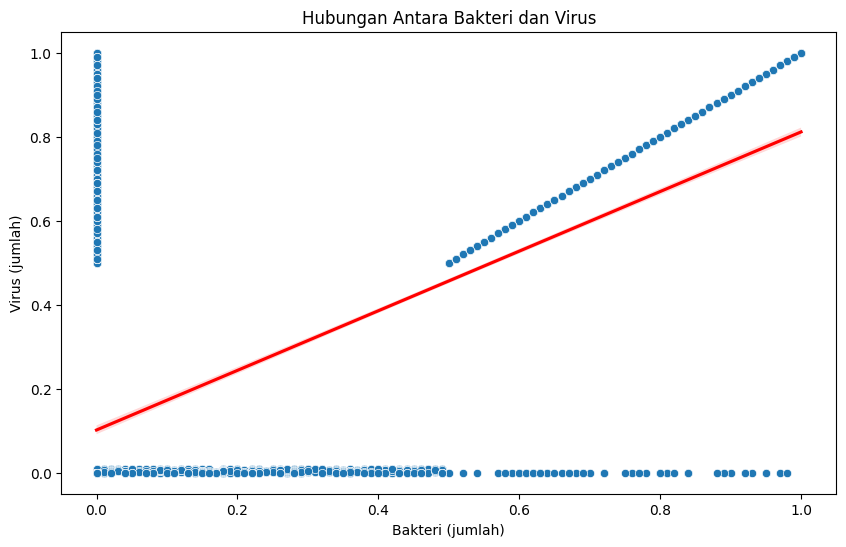

In [17]:
# Pemanggilan Fungsi Untuk Setiap Kolom Data
scatterplot_with_regression(df['bacteria'], df['viruses'], 'Bakteri (jumlah)', 'Virus (jumlah)', 'Hubungan Antara Bakteri dan Virus')

***Insight:***

Keberadaan bakteri patogen dan virus sering kali ditemukan bersama dalam sumber air yang terkontaminasi, terutama jika kontaminasi berasal dari limbah manusia atau hewan. Kondisi sanitasi yang buruk sering kali mengakibatkan kehadiran keduanya. Data menunjukkan korelasi positif antara keberadaan bakteri patogen dan virus dalam sampel air. Berikut adalah beberapa penjelasan tentang mengapa fenomena ini bisa terjadi:

- Limbah manusia atau hewan, terutama jika tidak diolah dengan baik, dapat mengandung berbagai patogen termasuk bakteri dan virus.

- Bakteri dan virus dapat bertahan dan berkembang biak dalam air yang terkontaminasi oleh limbah.

- Kondisi sanitasi yang buruk, seperti saluran air yang tersumbat, air yang tergenang, atau kurangnya pengolahan limbah, menciptakan lingkungan yang ideal bagi pertumbuhan dan penyebaran bakteri dan virus.

- Di daerah dengan infrastruktur sanitasi yang kurang berkembang atau kurangnya sistem pengolahan limbah yang efektif, limbah manusia atau hewan mungkin tidak diolah dengan baik sebelum dibuang ke lingkungan, menyebabkan kontaminasi air yang lebih tinggi oleh bakteri dan virus.

---


#### **Hubungan Arsenik dan Selenium**

---

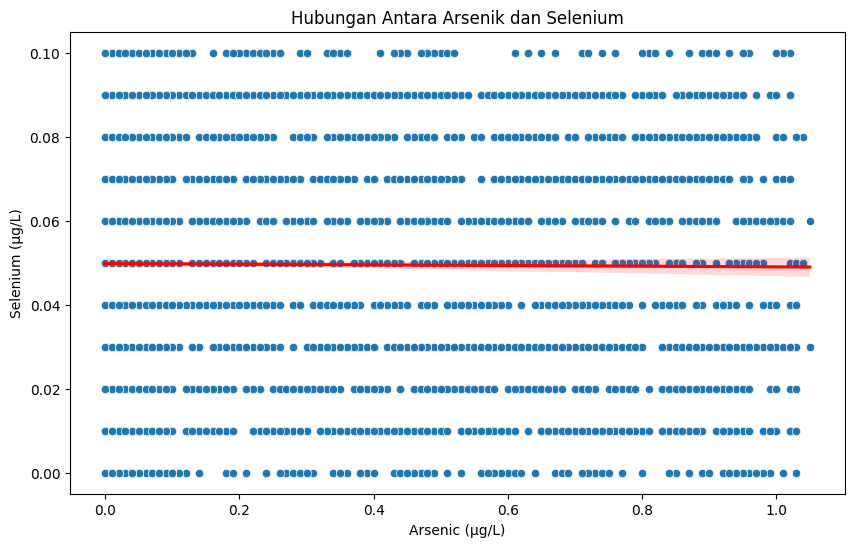

In [18]:
# Pemanggilan Fungsi Untuk Setiap Kolom Data
scatterplot_with_regression(df['arsenic'], df['selenium'], 'Arsenic (µg/L)', 'Selenium (µg/L)', 'Hubungan Antara Arsenik dan Selenium')

***Insight:***

Data menunjukkan korelasi yang datar antara konsentrasi arsenik dan selenium dalam air, meskipun keduanya dapat ditemukan bersama-sama dalam beberapa daerah karena proses geologi yang sama, fenomena ini bisa dijelaskan oleh beberapa faktor:

- Meskipun kedua unsur ini dapat dilepaskan ke dalam air melalui pelapukan batuan yang mengandung mineral-mineral tersebut, distribusi geologi dari batuan tersebut mungkin tidak seragam di seluruh wilayah. Sebagai hasilnya, beberapa daerah mungkin memiliki konsentrasi yang lebih tinggi dari satu unsur daripada yang lain, menyebabkan korelasi yang datar antara keduanya.

- Sistem hidrologis dan sifat aliran air tanah juga dapat mempengaruhi konsentrasi dan distribusi arsenik dan selenium dalam air tanah

- Arsenik dan selenium dapat berinteraksi dengan komponen lingkungan lain, termasuk mineral lain, nutrien, dan bahan organik dalam air tanah. Interaksi ini dapat mempengaruhi kelangsungan hidup, transportasi, dan distribusi dari masing-masing unsur, dan dapat menyebabkan variasi dalam konsentrasi keduanya yang tidak selalu berbanding lurus.

- Kegiatan manusia seperti pertanian, industri, dan penggunaan bahan kimia dapat mempengaruhi konsentrasi arsenik dan selenium dalam air tanah melalui polusi langsung atau perubahan pada kondisi lingkungan. Variabilitas dalam paparan antropogenik ini dapat menyebabkan variasi yang kompleks dalam konsentrasi keduanya di berbagai lokasi.

- Korelasi yang datar juga bisa disebabkan oleh metode analisis atau deteksi yang tidak cukup sensitif untuk mendeteksi perbedaan konsentrasi yang lebih kecil antara arsenik dan selenium. Ini dapat menghasilkan hasil yang tampak datar meskipun ada variasi sebenarnya dalam konsentrasi keduanya.

---


#### **Hubungan Timbal dan Copper**

---

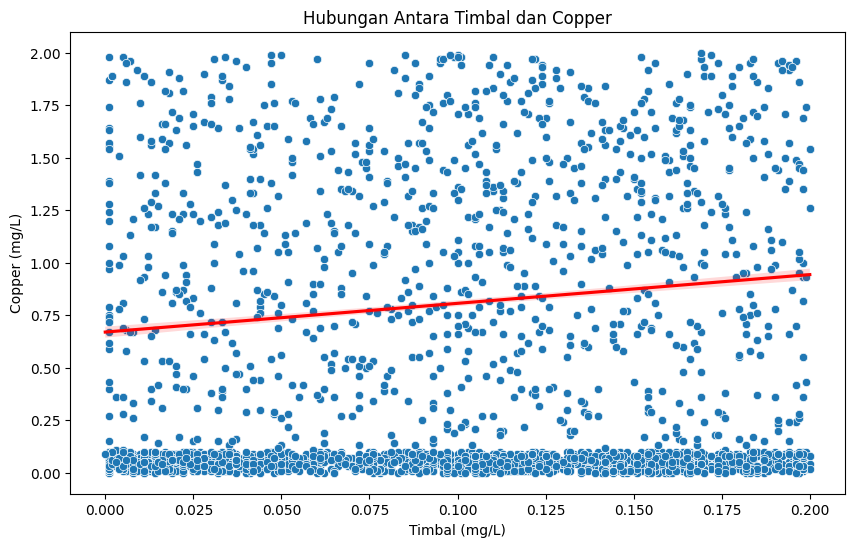

In [19]:
# Pemanggilan Fungsi Untuk Setiap Kolom Data
scatterplot_with_regression(df['lead'], df['copper'], 'Timbal (mg/L)', 'Copper (mg/L)', 'Hubungan Antara Timbal dan Copper')

***Insight:***

Keduanya bisa ditemukan bersama dalam air minum akibat korosi pipa air. Ketika pipa yang mengandung timbal atau tembaga terkorosi, keduanya dapat larut ke dalam air. Data menunjukkan korelasi yang meningkat antara konsentrasi arsenik dan selenium dalam air minum, fenomena ini bisa dijelaskan dengan beberapa faktor yang terkait dengan korosi pipa air yang mengandung timbal atau tembaga:

- Korosi pada pipa air yang mengandung timbal atau tembaga dapat menyebabkan logam-logam tersebut larut ke dalam air minum

- Kondisi kimia air minum, seperti pH, oksigen terlarut, dan kandungan bahan organik, dapat mempengaruhi tingkat korosi pipa air dan pelarutan logam.

- Perubahan pada kondisi lingkungan, seperti suhu air, tekanan, dan kelembaban udara, dapat memengaruhi tingkat korosi pipa air dan laju pelarutan logam


---


#### **Hubungan Chloramine dan Bakteri**

---

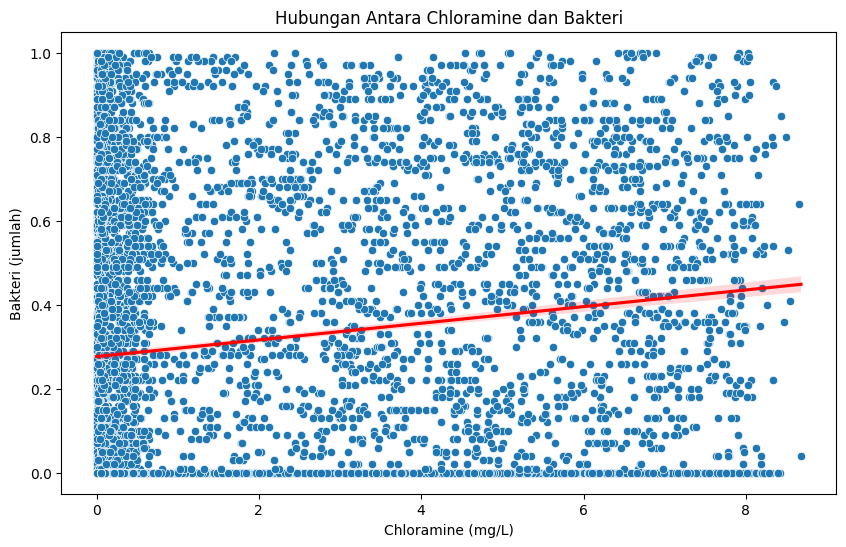

In [20]:
# Pemanggilan Fungsi Untuk Setiap Kolom Data
scatterplot_with_regression(df['chloramine'], df['bacteria'], 'Chloramine (mg/L)', 'Bakteri (jumlah)', 'Hubungan Antara Chloramine dan Bakteri')

***Insight:***

Chloramine sering digunakan sebagai desinfektan dalam pengolahan air untuk membunuh bakteri. Namun, jika chloramine tidak efektif atau konsentrasinya berkurang, bakteri dapat berkembang biak.

- Chloramine tidak efektif dalam membunuh bakteri atau konsentrasinya berkurang sebelum mencapai sumber kontaminasi, maka bakteri dapat berkembang biak dalam air

- Kualitas air sumber yang berbeda dapat mempengaruhi efektivitas chloramine sebagai desinfektan. Air yang lebih terkontaminasi mungkin memerlukan dosis chloramine yang lebih tinggi atau perlakuan tambahan untuk membunuh bakteri, sedangkan air yang lebih bersih mungkin memerlukan dosis yang lebih rendah.

- Variabilitas dalam jenis bakteri, keberadaan spora bakteri, atau resistensi bakteri terhadap chloramine juga dapat mempengaruhi hubungan antara konsentrasi chloramine dan bakteri dalam air minum

---


#### ***Heatmap* Korelasi**

---

In [21]:
# Menampilkan Nilai Ammonia
df[df['ammonia'] == '#NUM!']

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7551,0.03,#NUM!,0.08,0.79,0.07,0.08,0.05,0.58,0.34,0.00,0.0,0.183,4.37,1.43,0.007,0.62,2.54,0.07,0.05,0.05,#NUM!
7568,0.06,#NUM!,0.07,1.72,0.08,0.32,0.01,1.11,0.61,0.00,0.0,0.178,12.10,2.03,0.008,1.37,2.05,0.06,0.10,0.07,#NUM!
7890,0.01,#NUM!,0.08,0.49,0.00,0.07,0.09,0.06,0.72,0.57,0.0,0.088,9.57,1.45,0.009,7.67,7.70,0.03,0.05,0.02,#NUM!


In [22]:
# Menghapus Baris yang Memiliki Nilai '#NUM!' di Setiap Kolom
df_test = df.drop(df[df.eq('#NUM!').any(axis=1)].index)

In [23]:
#Mengubah Tipe Data Fitur
df_test['ammonia'] = df_test['ammonia'].astype(float)

In [24]:
#Mengubah Tipe Data is_safe
df_test = df_test.drop(['is_safe'], axis=1)

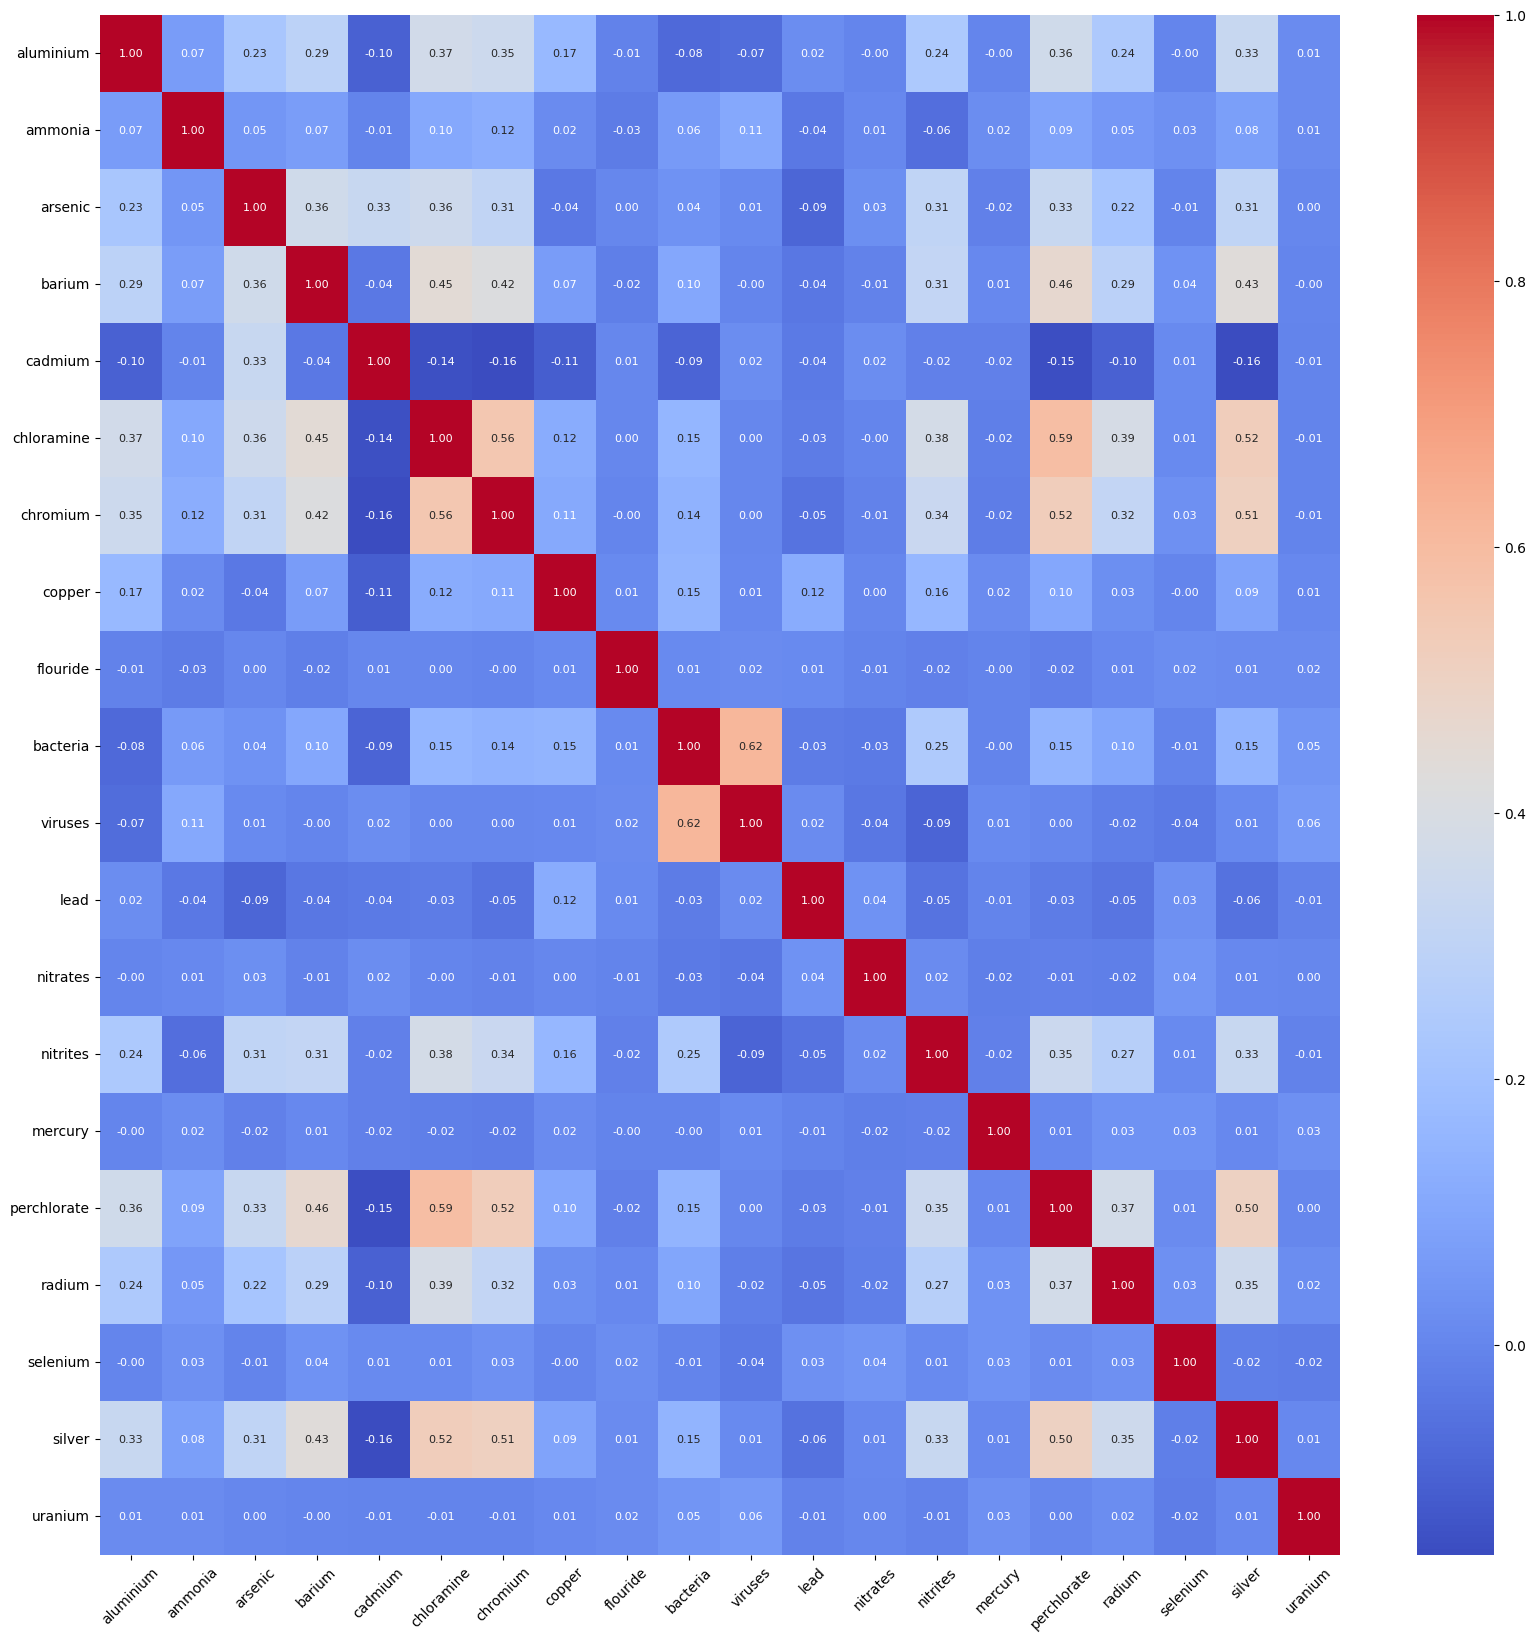

In [25]:
# Hitung korelasi
cor = df_test.corr()

# Set ukuran gambar
plt.figure(figsize=(20, 20))

# Buat heatmap
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size': 8})

# Atur rotasi teks pada label
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

In [26]:
# Hitung Korelasi
cor = df_test.corr()

# Membuat DataFrame dari Matriks Korelasi
cor_df = pd.DataFrame(cor.stack(), columns=['correlation'])

# Menambahkan Kolom Baris dan Kolom
cor_df.reset_index(inplace=True)
cor_df.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Menambahkan Kolom Interpretasi
cor_df['Interpretation'] = np.where(cor_df['Correlation'] < 0.05, 'Ada korelasi', 'Tidak ada korelasi')

# # Menampilkan DataFrame
# pd.options.display.max_columns = None
# cor_df

In [27]:
# Menampilkan DataFrame Tanpa Pembatas Baris
pd.options.display.max_rows = None
print(cor_df)

      Variable 1   Variable 2  Correlation      Interpretation
0      aluminium    aluminium     1.000000  Tidak ada korelasi
1      aluminium      ammonia     0.067369  Tidak ada korelasi
2      aluminium      arsenic     0.225725  Tidak ada korelasi
3      aluminium       barium     0.294091  Tidak ada korelasi
4      aluminium      cadmium    -0.099902        Ada korelasi
5      aluminium   chloramine     0.369221  Tidak ada korelasi
6      aluminium     chromium     0.353134  Tidak ada korelasi
7      aluminium       copper     0.168569  Tidak ada korelasi
8      aluminium     flouride    -0.009877        Ada korelasi
9      aluminium     bacteria    -0.078324        Ada korelasi
10     aluminium      viruses    -0.071040        Ada korelasi
11     aluminium         lead     0.020957        Ada korelasi
12     aluminium     nitrates    -0.003851        Ada korelasi
13     aluminium     nitrites     0.237439  Tidak ada korelasi
14     aluminium      mercury    -0.003129        Ada k

***Insight:***

Untuk memahami hubungan antara berbagai kolom dalam dataset, akan dilakukan plot berdasarkan nilai korelasi antara kolom-kolom tersebut. Plot ini kemudian akan divisualisasikan dalam bentuk heatmap untuk memberikan gambaran yang lebih jelas tentang sejauh mana kolom-kolom tersebut saling berhubungan. Selain visualisasi dalam heatmap, interpretasi hubungan ini juga akan disajikan dalam bentuk tabel. Dengan demikian, analisis lebih lanjut antara setiap *feature* dalam dataset dapat dilakukan dengan lebih terstruktur dan mendetail.

---


### **Cek Statistika Deskriptif**

---

In [28]:
# Melihat Informasi Statistika
df.describe().T

,count,mean,std,min,25%,50%,75%,max
aluminium,7999.0,0.666158,1.265145,0.0,0.040,0.070,0.280,5.05
arsenic,7999.0,0.161445,0.252590,0.0,0.030,0.050,0.100,1.05
barium,7999.0,1.567715,1.216091,0.0,0.560,1.190,2.480,4.94
cadmium,7999.0,0.042806,0.036049,0.0,0.008,0.040,0.070,0.13
chloramine,7999.0,2.176831,2.567027,0.0,0.100,0.530,4.240,8.68
chromium,7999.0,0.247226,0.270640,0.0,0.050,0.090,0.440,0.90
copper,7999.0,0.805857,0.653539,0.0,0.090,0.750,1.390,2.00
flouride,7999.0,0.771565,0.435373,0.0,0.405,0.770,1.160,1.50
bacteria,7999.0,0.319665,0.329485,0.0,0.000,0.220,0.610,1.00
viruses,7999.0,0.328583,0.378096,0.0,0.002,0.008,0.700,1.00


In [29]:
# Fungsi Untuk Menghitung Mean, Median, Mode dan Mengevaluasi Distribusi
def evaluate_distribution(col):
    mean = col.mean()
    median = col.median()
    mode = col.mode()[0]  # Ambil mode pertama jika ada beberapa mode
    if (abs(mean - median) / mean <= 0.05 and abs(mean - mode) / mean <= 0.05):
        evaluasi = 'Distribusi Normal'
    elif mean > median:
        evaluasi = 'Skewness Positif'
    else:
        evaluasi = 'Skewness Negatif'
    return pd.Series({'Mean': mean, 'Median': median, 'Mode': mode, 'Evaluasi': evaluasi})

# Memilih Hanya Kolom Numerik
numerical_cols = df.select_dtypes(include=[np.number])

# Terapkan Fungsi ke Setiap Kolom Numerik dalam DataFrame
result = numerical_cols.apply(evaluate_distribution)
result

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
Mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.09945,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
Median,0.07,0.05,1.19,0.04,0.53,0.09,0.75,0.77,0.22,0.008,0.102,9.93,1.42,0.005,7.74,2.41,0.05,0.08,0.05
Mode,0.09,0.04,0.23,0.09,0.09,0.04,0.05,1.43,0.0,0.0,0.001,8.32,1.2,0.006,0.05,0.06,0.06,0.04,0.02
Evaluasi,Skewness Positif,Skewness Positif,Skewness Positif,Skewness Positif,Skewness Positif,Skewness Positif,Skewness Positif,Skewness Positif,Skewness Positif,Skewness Positif,Skewness Negatif,Skewness Negatif,Skewness Negatif,Skewness Positif,Skewness Positif,Skewness Positif,Skewness Negatif,Skewness Positif,Skewness Negatif


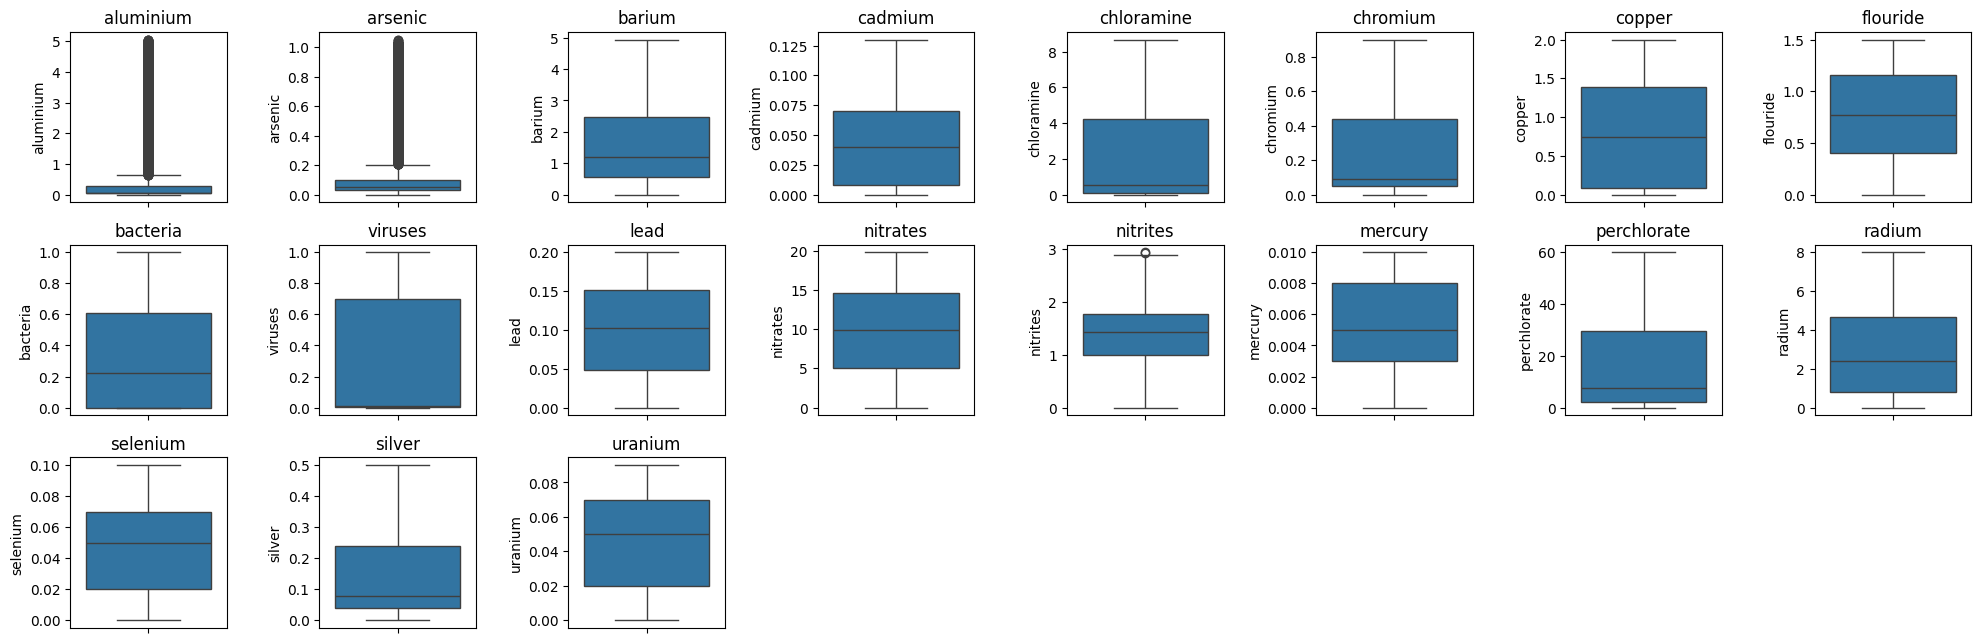

In [30]:
# Membuat Fungsi Boxplot
def boxplot_for_all_columns(df):

    # Filter Hanya Kolom Numerik
    numeric_columns = df.select_dtypes(include=['int', 'float']).columns
    
    # Mengatur Ukuran Plot
    plt.figure(figsize=(20, 15))

    # Loop Melalui Setiap Kolom Numerik dan Membuat Box Plot
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(7, 8, i)
        sns.boxplot(y=df[column])
        plt.title(column)

    plt.tight_layout()
    plt.show()

# Contoh Pemanggilan Fungsi
boxplot_for_all_columns(df)

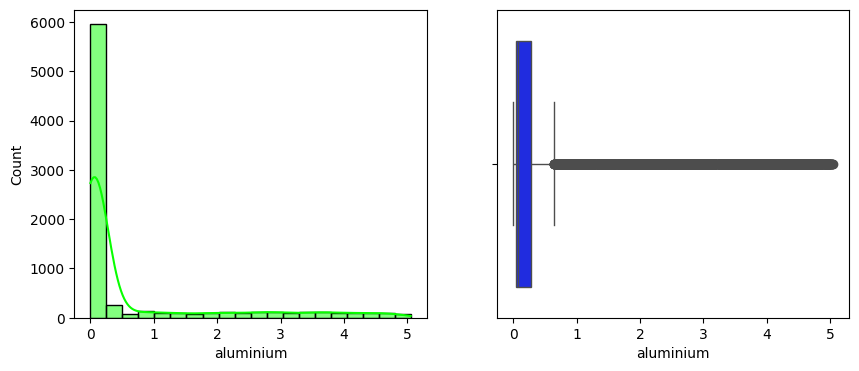

In [31]:
# Contoh Penggunaan Fungsi
histogram_boxplot(df['aluminium'])

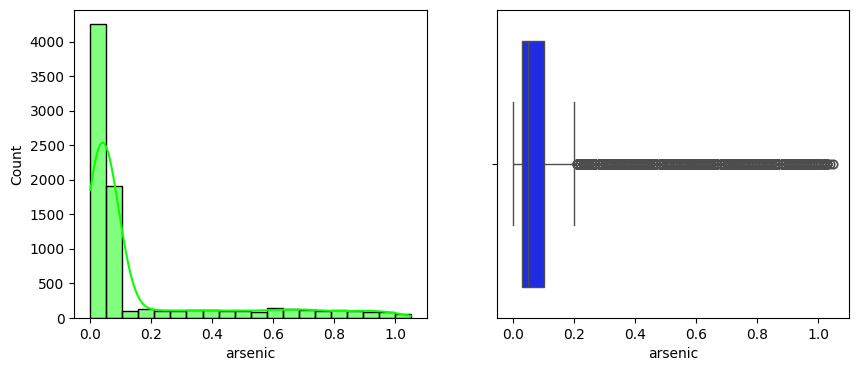

In [32]:
# Contoh Penggunaan Fungsi
histogram_boxplot(df['arsenic'])

***Insight:***

- Akan dilakukan analisis deskriptif untuk setiap kolom dalam dataset. Diketahui bahwa ada nilai-nilai yang memiliki mean yang lebih tinggi dibandingkan dengan median, yang menandakan adanya skewness positif. Sebaliknya, jika nilai median lebih tinggi dari mean, hal tersebut menunjukkan adanya skewness negatif.

- Pada sesi ini, dilakukan analisis outlier untuk setiap kolom. Dari analisis tersebut, diketahui bahwa ada dua kolom yang memiliki jumlah outlier yang lebih tinggi, yaitu kolom alumninium dan arsenic.

- Diketahui bahwa nilai aluminium dan arsenic memiliki karakteristik yang berbeda. Berdasarkan analisis data ini, terdapat beberapa dugaan yang dapat diajukan untuk menjelaskan perbedaan tersebut:

    1. Pelapukan Batuan: Salah satu kemungkinan adalah adanya pelapukan batuan yang melepaskan aluminium dan arsenik ke dalam lingkungan secara tidak merata. Proses pelapukan ini dapat menyebabkan variasi dalam konsentrasi kedua elemen tersebut di berbagai lokasi.

    2. Aktivitas Manusia di Bidang Pertanian: Dugaan lain adalah bahwa aktivitas manusia, khususnya dalam bidang pertanian, turut berkontribusi pada perbedaan karakteristik ini. Penggunaan pupuk, pestisida, dan herbisida yang mengandung aluminium dan arsenik mungkin tidak dilakukan secara merata di seluruh area, sehingga menyebabkan variasi dalam kadar kedua elemen tersebut.

    3. Kesalahan dalam Pengambilan Sampel: Selain faktor-faktor lingkungan dan aktivitas manusia, ada juga kemungkinan bahwa perbedaan karakteristik ini disebabkan oleh kesalahan dalam pengambilan sampel. Kesalahan metodologis atau teknis dalam proses pengambilan sampel dapat menghasilkan data yang tidak representatif atau bias, yang pada gilirannya mempengaruhi hasil analisis.


---


## ***Feature Engineering***

---

### **Memisahkan nilai X dan y** 

---

In [33]:
# Memisahkan `X` and `y`
X = df.drop(['is_safe'], axis=1)
y = df['is_safe']
X.head(2)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.00,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.65,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05


In [34]:
# Menampilkan Nilai y
y.head()

0    1
1    1
2    0
3    1
4    1
Name: is_safe, dtype: object

In [35]:
# Menampilkan Nilai y
y.value_counts()

is_safe
0        7084
1         912
#NUM!       3
Name: count, dtype: int64

***Insight:***

Dilakukan pemisahan pada dataframe untuk mendapatkan nilai *feature* (X) dan target/label (y). Pada langkah berikutnya, data akan dilakukan pemisahan lebih lanjut (*split*) untuk keperluan analisis dan pemodelan.

---


### ***Splitting* Dataset**

---

In [36]:
# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

print('X_Train size : ', X_train.shape)
print('X_Test size  : ', X_test.shape)
print('y_Train size  : ', y_train.shape)
print('y_Test size  : ', y_test.shape)

X_Train size :  (5599, 20)
X_Test size  :  (2400, 20)
y_Train size  :  (5599,)
y_Test size  :  (2400,)


***Insight:*** 

*Splitting* dataset telah dilakukan dengan proporsi sebagai berikut:

- Data Train = 70%
- Data Test = 30%

Proses pemisahan ini menggunakan nilai *random state* sebesar 42 untuk memastikan reprodusibilitas hasil, serta parameter *stratify* untuk memastikan distribusi nilai y tetap merata antara data *train* dan data *test* saat dilakukan pemisahan.

---

### ***Handling Missing Value***

---

In [37]:
# Menghitung Persentase Kemunculan Nilai '#NUM!' di Setiap Kolom
percentage_num = (X_train == '#NUM!').mean() * 100

# Menghitung Jumlah Total Kemunculan Nilai '#NUM!' di Setiap Kolom
count_num = (X_train == '#NUM!').sum()

# Menggabungkan Hasil
result = pd.concat([percentage_num, count_num], axis=1)
result.columns = ['Percentage', 'Count']

#Menampilkan Hasil
print(result)

             Percentage  Count
aluminium      0.000000      0
ammonia        0.035721      2
arsenic        0.000000      0
barium         0.000000      0
cadmium        0.000000      0
chloramine     0.000000      0
chromium       0.000000      0
copper         0.000000      0
flouride       0.000000      0
bacteria       0.000000      0
viruses        0.000000      0
lead           0.000000      0
nitrates       0.000000      0
nitrites       0.000000      0
mercury        0.000000      0
perchlorate    0.000000      0
radium         0.000000      0
selenium       0.000000      0
silver         0.000000      0
uranium        0.000000      0


In [38]:
# Menghitung Persentase Kemunculan Nilai '#NUM!' di Setiap Kolom
percentage_num = (X_test == '#NUM!').mean() * 100

# Menghitung Jumlah Total Kemunculan Nilai '#NUM!' di Setiap Kolom
count_num = (X_test == '#NUM!').sum()

# Menggabungkan Hasil
result = pd.concat([percentage_num, count_num], axis=1)
result.columns = ['Percentage', 'Count']

#Menampilkan Hasil
print(result)

             Percentage  Count
aluminium      0.000000      0
ammonia        0.041667      1
arsenic        0.000000      0
barium         0.000000      0
cadmium        0.000000      0
chloramine     0.000000      0
chromium       0.000000      0
copper         0.000000      0
flouride       0.000000      0
bacteria       0.000000      0
viruses        0.000000      0
lead           0.000000      0
nitrates       0.000000      0
nitrites       0.000000      0
mercury        0.000000      0
perchlorate    0.000000      0
radium         0.000000      0
selenium       0.000000      0
silver         0.000000      0
uranium        0.000000      0


In [39]:
# Menampilkan Nilai Ammonia
X_train[X_train['ammonia'] == '#NUM!']

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
7568,0.06,#NUM!,0.07,1.72,0.08,0.32,0.01,1.11,0.61,0.0,0.0,0.178,12.10,2.03,0.008,1.37,2.05,0.06,0.10,0.07
7551,0.03,#NUM!,0.08,0.79,0.07,0.08,0.05,0.58,0.34,0.0,0.0,0.183,4.37,1.43,0.007,0.62,2.54,0.07,0.05,0.05


In [40]:
# Menampilkan Nilai Ammonia
X_test[X_test['ammonia'] == '#NUM!']

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
7890,0.01,#NUM!,0.08,0.49,0.0,0.07,0.09,0.06,0.72,0.57,0.0,0.088,9.57,1.45,0.009,7.67,7.7,0.03,0.05,0.02


In [41]:
# Menampilkan Nilai y_train
y_train.value_counts()

is_safe
0        4959
1         638
#NUM!       2
Name: count, dtype: int64

In [42]:
# Menghapus Baris yang Memiliki Nilai '#NUM!' di y_train
y_train = y_train[y_train != '#NUM!']

# Menjaga Konsistensi dengan X_train
X_train = X_train.loc[y_train.index]

In [43]:
# Menghapus Baris yang Memiliki Nilai '#NUM!' di y_test
y_test = y_test[y_test != '#NUM!']

# Menjaga Konsistensi dengan X_test
X_test = X_test.loc[y_test.index]

In [44]:
# Menampilkan Nilai Ammonia
X_train[X_train['ammonia'] == '#NUM!']

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium


In [45]:
# Menampilkan Nilai Ammonia
X_test[X_test['ammonia'] == '#NUM!']

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium


In [46]:
#Mengubah Tipe Data fitur
X_train['ammonia'] = X_train['ammonia'].astype(float)

In [47]:
#Mengubah Tipe Data fitur
X_test['ammonia'] = X_test['ammonia'].astype(float)

In [48]:
#Mengubah Tipe Data is_safe
y_train= y_train.astype(int)

In [49]:
#Mengubah Tipe Data is_safe
y_test = y_test.astype(int)

In [50]:
# Menampilkan Informasi X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5597 entries, 3903 to 3898
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    5597 non-null   float64
 1   ammonia      5597 non-null   float64
 2   arsenic      5597 non-null   float64
 3   barium       5597 non-null   float64
 4   cadmium      5597 non-null   float64
 5   chloramine   5597 non-null   float64
 6   chromium     5597 non-null   float64
 7   copper       5597 non-null   float64
 8   flouride     5597 non-null   float64
 9   bacteria     5597 non-null   float64
 10  viruses      5597 non-null   float64
 11  lead         5597 non-null   float64
 12  nitrates     5597 non-null   float64
 13  nitrites     5597 non-null   float64
 14  mercury      5597 non-null   float64
 15  perchlorate  5597 non-null   float64
 16  radium       5597 non-null   float64
 17  selenium     5597 non-null   float64
 18  silver       5597 non-null   float64
 19  uranium 

In [51]:
# Menampilkan Informasi X_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2399 entries, 7036 to 3115
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    2399 non-null   float64
 1   ammonia      2399 non-null   float64
 2   arsenic      2399 non-null   float64
 3   barium       2399 non-null   float64
 4   cadmium      2399 non-null   float64
 5   chloramine   2399 non-null   float64
 6   chromium     2399 non-null   float64
 7   copper       2399 non-null   float64
 8   flouride     2399 non-null   float64
 9   bacteria     2399 non-null   float64
 10  viruses      2399 non-null   float64
 11  lead         2399 non-null   float64
 12  nitrates     2399 non-null   float64
 13  nitrites     2399 non-null   float64
 14  mercury      2399 non-null   float64
 15  perchlorate  2399 non-null   float64
 16  radium       2399 non-null   float64
 17  selenium     2399 non-null   float64
 18  silver       2399 non-null   float64
 19  uranium 

In [52]:
# Menampilkan Nilai y_train
y_train.value_counts()

is_safe
0    4959
1     638
Name: count, dtype: int64

In [53]:
# Menampilkan Nilai y_train
y_test.value_counts()

is_safe
0    2125
1     274
Name: count, dtype: int64

***Insight:*** 

*Missing value* dalam bentuk **#NUM!** pada dataset ini, sebagaimana telah dijelaskan sebelumnya. Setelah dilakukan proses split data, akan dilakukan penanganan terhadap *missing value*. Nilai **#NUM!** akan dihapus baik pada data *train* maupun data *test* karena jumlahnya hanya 3 data. Selain itu, akan dilakukan konversi data kategorikal menjadi data numerik untuk data yang mengandung nilai **#NUM!**. Sementara itu, untuk data pada target/label ditemukan ketidakseimbangan (*imbalance*). Pertimbangan untuk tidak melakukan penyeimbangan data dengan menggunakan metode SMOTE adalah:

- Menghindari terbentuknya overfitting karena penambahan data sintetis dapat mempengaruhi kinerja model dengan membuatnya terlalu sesuai dengan data latih.

- Ingin memanfaatkan informasi dari data asli tanpa mengubah distribusi asli dari kelas-kelas pada target/label.


---

### ***Outlier Handling***

---

#### **Menampilkan Persentase Outlier**

---

In [54]:
# Fungsi Pengecekan Skewness Data
def cek_skewness(data):
    skewness_data = pd.DataFrame({'Skewness': data.skew()})
    return skewness_data

In [55]:
# Melihat Skewness 
X_train_skew = cek_skewness(X_train)
X_test_skew = cek_skewness(X_test)

In [56]:
# Fungsi Menghitung Persentase Outlier
def calculate_outlier_percentage(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    outlier_percentage = (len(outliers) / len(data)) * 100
    return "{:.2f}%".format(outlier_percentage)

# Fungsi Melihat Hasil Outlier di Setiap Kolom (Data Dictionary)
def calculate_outlier_percentage_all_columns(data):
    outlier_percentage_dict = {}
    for column in data.columns:
        outlier_percentage = calculate_outlier_percentage(data[column])
        outlier_percentage_dict[column] = outlier_percentage
    return outlier_percentage_dict

In [57]:
# Menampilkan Persentase Outlier
X_train_numerik_persentase = calculate_outlier_percentage_all_columns(X_train)
X_test_numerik_persentase = calculate_outlier_percentage_all_columns(X_test)

# Membuat DataFrame dari hasil perhitungan
X_train_numerik_df = pd.DataFrame.from_dict(X_train_numerik_persentase, orient='index', columns=['Train_Outlier_Percentage_Before'])
X_test_numerik_df = pd.DataFrame.from_dict(X_test_numerik_persentase, orient='index', columns=['Test_Outlier_Percentage_Before'])
X_train_numerik_skew = X_train_skew.rename(columns={'Skewness': 'X_train Skewness_Before'})
X_test_numerik_skew = X_test_skew.rename(columns={'Skewness': 'X_test Skewness_Before'})

# Menggabungkan kedua DataFrame
merged_df = pd.concat([X_train_numerik_df, X_test_numerik_df, X_train_numerik_skew, X_test_numerik_skew], axis=1)

# Menampilkan DataFrame hasil penggabungan
merged_df

,Train_Outlier_Percentage_Before,Test_Outlier_Percentage_Before,X_train Skewness_Before,X_test Skewness_Before
aluminium,21.74%,21.51%,1.998497,2.047149
ammonia,0.00%,0.00%,0.014259,0.055822
arsenic,20.30%,20.34%,2.010134,1.928976
barium,0.00%,0.00%,0.665636,0.650417
cadmium,0.00%,0.00%,0.465807,0.507628
chloramine,0.00%,0.00%,0.901832,0.857074
chromium,0.00%,0.00%,1.018562,1.051418
copper,0.00%,0.00%,0.239288,0.286917
flouride,0.00%,0.00%,-0.039528,-0.041261
bacteria,0.00%,0.00%,0.570343,0.517951


***Insight:***

Seperti yang telah diamati dalam analisis EDA sebelumnya, ditemukan adanya outlier yang cukup signifikan pada kolom `aluminium` dan `arsenic`. Proporsi nilai *outlier* dalam kedua kolom tersebut mencapai sekitar 20%. Namun, berbeda dengan kedua kolom tersebut, tidak terdeteksi adanya *outlier* pada kolom-kolom lain dalam dataset ini. Selain itu, pada analisis *skewness*, terlihat bahwa beberapa kolom masih menunjukkan nilai skewness di luar rentang ideal antara -0,5 dan -1 (untuk skewness negatif) atau antara 0,5 dan 1 (untuk skewness positif), yang menandakan bahwa distribusi data tersebut tidak berdistribusi secara normal. Namun, meskipun demikian, terdapat beberapa kolom di mana nilai skewness masih berada dalam rentang yang diinginkan.


---

#### ***Capping/Sensoring* Data**

---

In [58]:
# Fungsi Winzoriser
def winsoriser(df):
    # Inisialisasi Winsorizer untuk kolom saat ini
    winsorizer = Winsorizer(
        capping_method='iqr',
        tail='both',
        fold=1.5
    )
    winsorizer2 = Winsorizer(
        capping_method='iqr',
        tail='both',
        fold=3
    )
    for column in df.columns:
        # Melakukan censoring pada data train (df)
        if (abs(df[column].skew())  <= 1) & (abs(df[column].skew()) >= 0.5):
            df[column] = winsorizer.fit_transform(df[[column]])
        else:
            df[column] = winsorizer2.fit_transform(df[[column]])
    return df

In [59]:
# Winsorizer Data
X_train_new = winsoriser(X_train)
X_test_new = winsoriser(X_test)

In [60]:
# Melihat Skewness 
X_train_skew = cek_skewness(X_train_new)
X_test_skew = cek_skewness(X_test_new)

In [61]:
# Menampilkan Persentase Outlier
X_train_numerik_winsorizer_persentase = calculate_outlier_percentage_all_columns(X_train_new)
X_test_numerik_winsorizer_persentase = calculate_outlier_percentage_all_columns(X_test_new)

# Membuat DataFrame dari hasil perhitungan
X_train_numerik_winsorizer_df = pd.DataFrame.from_dict(X_train_numerik_winsorizer_persentase, orient='index', columns=['Train_Outlier_Percentage_After'])
X_test_numerik_winsorizer_df = pd.DataFrame.from_dict(X_test_numerik_winsorizer_persentase, orient='index', columns=['Test_Outlier_Percentage_After'])
X_train_numerik_winsorizer_skew = X_test_skew.rename(columns={'Skewness': 'X_train Skewness_After'})
X_test_numerik_winsorizer_skew = X_test_skew.rename(columns={'Skewness': 'X_test Skewness_After'})

# Menggabungkan kedua DataFrame
merged_df1 = pd.concat([X_train_numerik_winsorizer_df, X_test_numerik_winsorizer_df, X_train_numerik_winsorizer_skew, X_test_numerik_winsorizer_skew], axis=1)

# Menampilkan DataFrame hasil penggabungan
merged_df1

,Train_Outlier_Percentage_After,Test_Outlier_Percentage_After,X_train Skewness_After,X_test Skewness_After
aluminium,21.74%,21.51%,1.286438,1.286438
ammonia,0.00%,0.00%,0.055822,0.055822
arsenic,20.30%,20.34%,1.267413,1.267413
barium,0.00%,0.00%,0.650417,0.650417
cadmium,0.00%,0.00%,0.507628,0.507628
chloramine,0.00%,0.00%,0.857074,0.857074
chromium,0.00%,0.00%,1.051418,1.051418
copper,0.00%,0.00%,0.286917,0.286917
flouride,0.00%,0.00%,-0.041261,-0.041261
bacteria,0.00%,0.00%,0.517951,0.517951


In [62]:
# Merge DataFrame 
gabungan = pd.concat([merged_df, merged_df1], axis=1)
gabungan

,Train_Outlier_Percentage_Before,Test_Outlier_Percentage_Before,X_train Skewness_Before,X_test Skewness_Before,Train_Outlier_Percentage_After,Test_Outlier_Percentage_After,X_train Skewness_After,X_test Skewness_After
aluminium,21.74%,21.51%,1.998497,2.047149,21.74%,21.51%,1.286438,1.286438
ammonia,0.00%,0.00%,0.014259,0.055822,0.00%,0.00%,0.055822,0.055822
arsenic,20.30%,20.34%,2.010134,1.928976,20.30%,20.34%,1.267413,1.267413
barium,0.00%,0.00%,0.665636,0.650417,0.00%,0.00%,0.650417,0.650417
cadmium,0.00%,0.00%,0.465807,0.507628,0.00%,0.00%,0.507628,0.507628
chloramine,0.00%,0.00%,0.901832,0.857074,0.00%,0.00%,0.857074,0.857074
chromium,0.00%,0.00%,1.018562,1.051418,0.00%,0.00%,1.051418,1.051418
copper,0.00%,0.00%,0.239288,0.286917,0.00%,0.00%,0.286917,0.286917
flouride,0.00%,0.00%,-0.039528,-0.041261,0.00%,0.00%,-0.041261,-0.041261
bacteria,0.00%,0.00%,0.570343,0.517951,0.00%,0.00%,0.517951,0.517951


***Insight:***

Setelah dilakukan proses *capping*, terlihat bahwa beberapa data telah berhasil mengurangi *skewness* mereka sehingga nilai *skewnessnya* kini berada dalam rentang ideal, yaitu antara -0,5 dan -1 untuk *skewness* negatif, serta antara 0,5 dan 1 untuk *skewness* positif. Namun, ada beberapa data yang mengalami sedikit peningkatan dalam nilai *skewness* mereka. Hal ini disebabkan oleh sifat data yang sebelumnya tidak terlihat menjadi lebih terlihat setelah proses *capping* diterapkan. Meskipun demikian, untuk kolom `aluminium` dan `ammonia`, masih terdapat *outlier* yang ekstrem setelah proses *capping*. Walau begitu, *skewness* pada kedua kolom tersebut berhasil berkurang hingga mendekati nilai 1. Hal ini disebabkan oleh adanya variabilitas yang tinggi dalam data tersebut, yang membuat penanganan outlier menjadi lebih sulit.

---

### ***Feature Selection***

---

### ***Feature Importance***

---

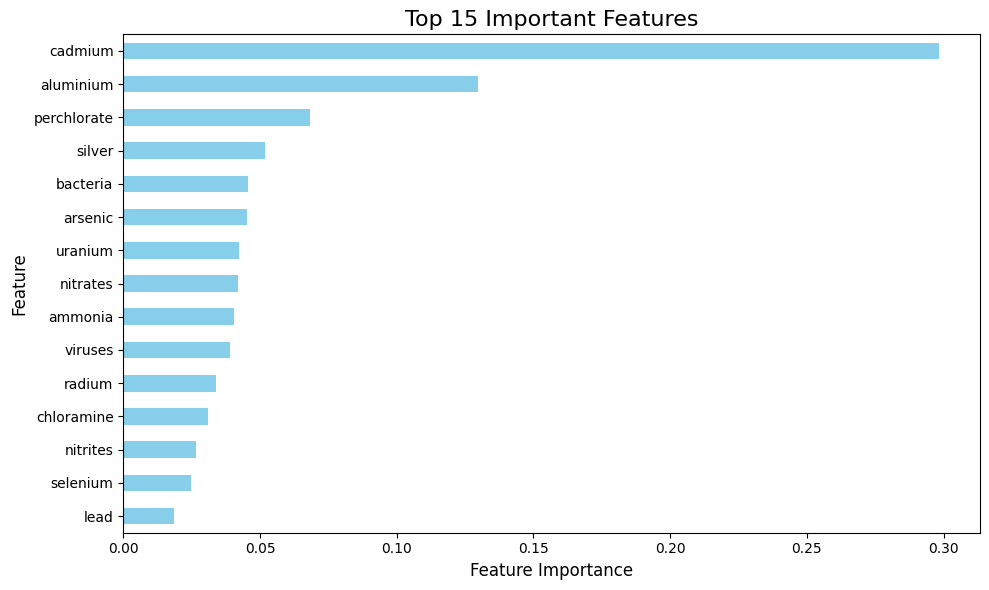

In [63]:
# Membuat dan Melatih Model XGBoost
model = XGBClassifier()
model.fit(X_train_new, y_train)

# Menghitung dan Menampilkan Fitur Penting
feat_importances = pd.Series(model.feature_importances_, index=X_train_new.columns)

# Plot 15 Fitur Penting
plt.figure(figsize=(10, 6))  # Menentukan ukuran gambar
feat_importances.nlargest(15).plot(kind='barh', color='skyblue')  # Menambahkan Warna dan Membalik Sumbu y
plt.title('Top 15 Important Features', fontsize=16)  # Menambahkan Judul dengan Ukuran Font yang Lebih Besar
plt.xlabel('Feature Importance', fontsize=12)  # Menambahkan Label Sumbu x
plt.ylabel('Feature', fontsize=12)  # Menambahkan Label Sumbu y
plt.gca().invert_yaxis()  # Membalikkan Sumbu y
plt.tight_layout()  # Mengatur Layout Agar Lebih Rapi
plt.show()

In [64]:
# Kolom yang ingin dihapus
kolom_dihapus = ['barium', 'chromium', 'flouride', 'nitrates', 'mercury']

# Menghapus kolom dari x_train
X_train_new = X_train_new.drop(kolom_dihapus, axis=1)

# Menghapus kolom dari x_test
X_test_new = X_test_new.drop(kolom_dihapus, axis=1)

In [65]:
# Menampilkan Kolom X_train_new
X_train_new.head()

,aluminium,ammonia,arsenic,cadmium,chloramine,copper,bacteria,viruses,lead,nitrites,perchlorate,radium,selenium,silver,uranium
3903,0.08,8.01,0.310,0.080,3.28,0.02,0.97,0.970,0.166,1.35,17.20,3.54,0.05,0.50,0.01
3147,0.08,1.24,0.310,0.050,4.09,1.99,0.33,0.001,0.050,1.28,20.73,6.66,0.09,0.16,0.00
2572,0.04,20.37,0.001,0.006,0.23,1.93,0.42,0.006,0.195,1.15,2.16,7.47,0.09,0.49,0.08
5168,0.01,20.83,0.080,0.040,0.03,0.08,0.00,0.700,0.157,0.05,5.25,0.74,0.04,0.01,0.02
3093,0.18,22.74,0.310,0.090,3.36,1.57,0.58,0.580,0.071,1.75,34.54,3.32,0.05,0.32,0.06


In [66]:
# Menampilkan Kolom X_test_new
X_test_new.head()

,aluminium,ammonia,arsenic,cadmium,chloramine,copper,bacteria,viruses,lead,nitrites,perchlorate,radium,selenium,silver,uranium
7036,0.09,26.72,0.03,0.05,0.06,0.91,0.44,0.006,0.107,2.02,11.16,0.26,0.04,0.04,0.00
7959,0.01,0.29,0.07,0.05,0.00,0.06,0.35,0.000,0.102,1.75,0.49,4.04,0.03,0.09,0.03
1922,0.98,0.58,0.34,0.09,2.66,1.05,0.70,0.700,0.096,1.62,12.42,4.03,0.03,0.37,0.08
6968,0.04,6.59,0.05,0.03,0.18,0.55,0.26,0.006,0.180,1.83,6.30,0.35,0.08,0.06,0.01
1966,0.98,21.94,0.34,0.08,0.61,0.10,0.22,0.004,0.089,1.75,16.12,7.81,0.07,0.20,0.00


***Insight:***

- Diberikan sebuah dataset yang terdiri dari 20 senyawa. Untuk menentukan senyawa yang paling relevan atau signifikan dalam dataset tersebut, akan digunakan metode *Feature Importance* dalam algoritma **XGBoost**. Dalam metode ini, **XGBoost** menggunakan skor *Gain* atau *Gain Ratio8 untuk mengevaluasi pentingnya sebuah *feature*. *Feature* yang memiliki nilai penting yang tinggi mungkin memiliki dampak besar terhadap prediksi model. Berdasarkan analisis *Feature Importance*, senyawa-senyawa yang dianggap memiliki pengaruh signifikan dalam dataset adalah sebagai berikut: 

    - cadmium 

    - aluminium 

    - perchlorate 

    - silver 

    - bacteria 

    - arsenic 

    - uranium 

    - nitrates 

    - ammonia 

    - viruses

    - radium 

    - chloramine 

    - nitrites

    - selenium,

    - lead

- Daerah yang tercermin dalam karakteristik tersebut adalah daerah industri berat yang terletak di dekat daerah pertambangan logam, dengan infrastruktur sanitasi yang buruk, dan kemungkinan terpengaruh oleh aktivitas geologis yang tinggi. Lingkungan semacam ini mungkin terdampak oleh polusi dari industri, limbah pertambangan, serta aktivitas pertanian intensif. Air di daerah ini cenderung tercemar oleh berbagai logam berat seperti cadmium, aluminium, silver, dan selenium, bersama dengan senyawa kimia beracun seperti arsenic, perchlorate, dan chloramine.
Selain itu, bakteri, virus, serta konsentrasi tinggi nitrat, ammonia, nitrit, uranium, dan radium juga dapat ditemukan dalam air sebagai akibat dari berbagai sumber pencemaran. Dalam konteks ini, tindakan remediasi dan pengelolaan lingkungan yang ketat diperlukan untuk mengatasi masalah kesehatan dan lingkungan yang mungkin timbul akibat kondisi ini. Senyawa-senyawa yang tidak memberikan pengaruh signifikan akan dihapus dari dataset.

---



#### **Memisahkan Kolom Kategorikal dan Numerik** 

---

In [67]:
# Mendapat nilai kategorik dan nilai numerik
cat_columns = X_train_new.select_dtypes(include=['object']).columns.tolist()
num_columns = X_train_new.select_dtypes(include = np.number).columns.tolist()

print('Numerical Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numerical Columns:  ['aluminium', 'ammonia', 'arsenic', 'cadmium', 'chloramine', 'copper', 'bacteria', 'viruses', 'lead', 'nitrites', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium']
Categorical Columns:  []


***Insight:***

Dilakukan proses pengambilan kolom pada data yang telah melalui proses *capping*, di mana kolom-kolom tersebut diklasifikasikan menjadi kolom numerik dan kolom kategorikal. Langkah ini penting untuk mempersiapkan data yang nantinya akan digunakan dalam model inferensi.

---

### ***Scalling***

---

In [68]:
# Menentukan Jenis Scalling 
scaler = MinMaxScaler()

***Insight:*** 

Umumnya, **MinMaxScaler** digunakan untuk data yang tidak memiliki *outlier* ekstrem dan data yang terdistribusi normal. Setelah melalui proses *capping*, berdasarkan analisis *outlier*, masih terdapat dua kolom yang memiliki *outlier* yang ekstrem. Namun, pada analisis *skewness*, meskipun data masih dianggap tidak terdistribusi secara normal, nilai *skewness* tidak terlalu jauh dari rentang yang diinginkan. Oleh karena itu, penggunaan **MinMaxScaler** akan dipertimbangkan untuk menormalisasi data tersebut.

---

## **Model *Definition***

---

### ***K-Nearest Neighbors (KNN)***

---

In [69]:
# Pipeline KNN Classifier
pipe_KNN = Pipeline([
    ('scaler', scaler),
    ('K-Nearest Neighbors (KNN)', KNeighborsClassifier())
])


---

### ***Support Vector Machine (SVM)***

---

In [70]:
# Pipeline SVC classifier
pipe_SVC = Pipeline([
    ('scaler', scaler),
    ('Support Vector Classifier (SVC)', SVC())
])

---

### ***Decision Tree***

---

In [71]:
# Pipeline Decision Tree Classifier
pipe_DT = Pipeline([
    ('scaler', scaler),
    ('Decision Tree Classifier', DecisionTreeClassifier())
])

---

### ***Random Forest***

---

In [72]:
# Pipeline Random Forest Classifier
pipe_RF= Pipeline([
    ('scaler', scaler),
    ('Random Forest Classifier', RandomForestClassifier())
])

---

### ***XGBoost***

---

In [73]:
# Pipeline SVC classifier
pipe_XGB = Pipeline([
    ('scaler', scaler),
    ('Random Forest Classifier', XGBClassifier())
])

***Insight:*** 

Pipeline adalah model yang mengintegrasikan dua tahap penting dalam proses machine learning, yaitu standarisasi data dan klasifikasi menggunakan berbagai algoritma seperti `K-Nearest Neighbors (KNN)`, `Support Vector Classifier (SVC)`, `Decision Tree Classifier`, `Random Forest Classifier`, dan `Extreme Gradient Boosting (XGBoost) Classifier`. Pertama, data akan melalui tahap standarisasi oleh scaler untuk memastikan setiap fitur memiliki skala yang seragam, yang penting untuk kinerja optimal dari berbagai algoritma. Setelah proses standarisasi, data yang telah dipersiapkan akan digunakan oleh masing-masing classifier untuk melakukan klasifikasi sesuai dengan prinsip dan karakteristik masing-masing algoritma. Dengan menggunakan pipeline ini, proses preprocessing dan klasifikasi dilakukan secara efisien dan terstruktur, yang dapat meningkatkan kinerja dan keandalan model dalam melakukan prediksi.


---

## ***Model Training***

---

### ***K-Nearest Neighbors (KNN)***

---

In [74]:
# Fit pada KNN
pipe_KNN.fit(X_train_new, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('K-Nearest Neighbors (KNN)', KNeighborsClassifier())])

---

### ***Support Vector Machine (SVM)***

---

In [75]:
# Fit pada SVC
pipe_SVC.fit(X_train_new, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('Support Vector Classifier (SVC)', SVC())])

---

### ***Decision Tree***

---

In [76]:
# Fit pada Decision Tree
pipe_DT.fit(X_train_new, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('Decision Tree Classifier', DecisionTreeClassifier())])

---

### ***Random Forest***

---

In [77]:
# Fit pada Random Forest
pipe_RF.fit(X_train_new, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('Random Forest Classifier', RandomForestClassifier())])

---

### ***XGBoost***

---

In [78]:
# Fit pada XGBoost
pipe_XGB.fit(X_train_new, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('Random Forest Classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

***Insight:*** 

Pada langkah-langkah fit untuk berbagai model pipeline, data pelatihan (`X_train_new`) dan label (`y_train`) digunakan untuk memperbarui setiap model. Proses ini terdiri dari dua tahap utama: standarisasi data menggunakan scaler dan penerapan algoritma klasifikasi yang sesuai, seperti `K-Nearest Neighbors (KNN)`, `Support Vector Classifier (SVC)`, `Decision Tree Classifier`, `Random Forest Classifier`, dan `Extreme Gradient Boosting (XGBoost) Classifier`. Setelah pelatihan selesai, masing-masing model siap digunakan untuk memprediksi kelas pada data baru.

---

## ***Model Evaluation***

---

### ***K-Nearest Neighbors (KNN)***

---

In [79]:
# Memeriksa Kinerja Model
y_pred_train = pipe_KNN.predict(X_train_new)
y_pred_test = pipe_KNN.predict(X_test_new)

Train
              precision    recall  f1-score   support

   Dangerous       0.96      0.99      0.97      4959
        Safe       0.89      0.67      0.76       638

    accuracy                           0.95      5597
   macro avg       0.92      0.83      0.87      5597
weighted avg       0.95      0.95      0.95      5597


Confusion Matrix      : 


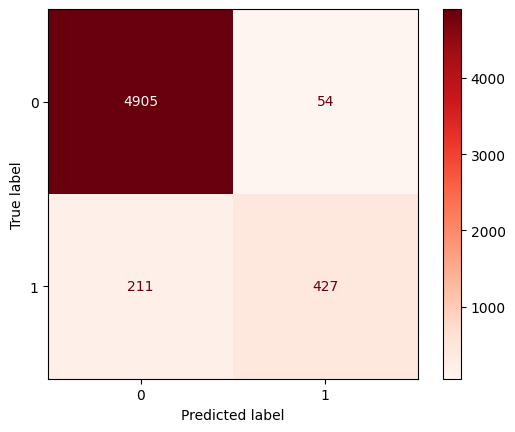

In [80]:
# Menampilkan Classification Report
print('Train')
target = ['Dangerous', 'Safe']
print(classification_report(y_train, y_pred_train, target_names=target))
print('')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_KNN, X_train_new, y_train, cmap='Reds'))

In [81]:
# List of different cv values to try
cv_values = [3, 4, 5, 6, 7]
results = {}

# Evaluate cross-validation for different values of cv
for cv in cv_values:
    f1_train_cross_val = cross_val_score(pipe_KNN,
                                         X_train_new,
                                         y_train,
                                         cv=cv,
                                         scoring="f1")
    results[cv] = f1_train_cross_val
    print(f'F1 Score - All - Cross Validation (cv={cv})  : ', f1_train_cross_val)
    print(f'F1 Score - Mean - Cross Validation (cv={cv}) : ', f1_train_cross_val.mean())
    print(f'F1 Score - Std - Cross Validation (cv={cv})  : ', f1_train_cross_val.std())
    print(f'F1 Score - Range of Test-Set (cv={cv})       : ', (f1_train_cross_val.mean() - f1_train_cross_val.std()), '-', (f1_train_cross_val.mean() + f1_train_cross_val.std()))
    print('-' * 50)

# Find the best cv value based on mean F1 Score
best_cv_mean = max(results, key=lambda cv: results[cv].mean())
best_f1_mean = results[best_cv_mean].mean()

# Find the best cv value based on the lowest std of F1 Score
best_cv_std = min(results, key=lambda cv: results[cv].std())
best_f1_std = results[best_cv_std].std()

print(f'The best cv value is {best_cv_mean} with a mean F1 Score of {best_f1_mean}')
print(f'The best cv value is {best_cv_std} with the lowest standard deviation of F1 Score: {best_f1_std}')


F1 Score - All - Cross Validation (cv=3)  :  [0.69892473 0.66843501 0.65053763]
F1 Score - Mean - Cross Validation (cv=3) :  0.672632459617999
F1 Score - Std - Cross Validation (cv=3)  :  0.01997568022185374
F1 Score - Range of Test-Set (cv=3)       :  0.6526567793961453 - 0.6926081398398527
--------------------------------------------------
F1 Score - All - Cross Validation (cv=4)  :  [0.68309859 0.64       0.68363636 0.67132867]
F1 Score - Mean - Cross Validation (cv=4) :  0.6695159066285826
F1 Score - Std - Cross Validation (cv=4)  :  0.017736625212600714
F1 Score - Range of Test-Set (cv=4)       :  0.651779281415982 - 0.6872525318411833
--------------------------------------------------
F1 Score - All - Cross Validation (cv=5)  :  [0.69026549 0.69090909 0.64285714 0.66985646 0.67256637]
F1 Score - Mean - Cross Validation (cv=5) :  0.6732909103006914
F1 Score - Std - Cross Validation (cv=5)  :  0.017533232122146334
F1 Score - Range of Test-Set (cv=5)       :  0.6557576781785451 - 0.

Test
              precision    recall  f1-score   support

   Dangerous       0.95      0.98      0.96      2125
        Safe       0.75      0.58      0.65       274

    accuracy                           0.93      2399
   macro avg       0.85      0.78      0.81      2399
weighted avg       0.92      0.93      0.93      2399


Confusion Matrix      : 


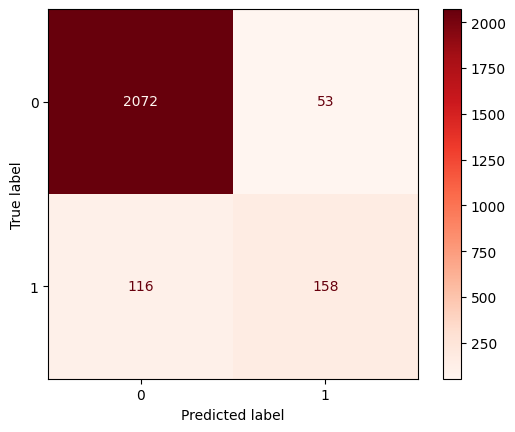

In [82]:
# Menampilkan Classification Report
print('Test')
target = ['Dangerous', 'Safe']
print(classification_report(y_test, y_pred_test, target_names=target))
print('')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_KNN, X_test_new, y_test, cmap='Reds'))

In [83]:
# Menampilkan Hasil Klasifikasi
all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
  score_reports = {
      'train - precision' : precision_score(y_train, y_pred_train),
      'train - recall' : recall_score(y_train, y_pred_train),
      'train - accuracy_score' : accuracy_score(y_train, y_pred_train),
      'train - f1_score' : f1_score(y_train, y_pred_train),
      'test - precision' : precision_score(y_test, y_pred_test),
      'test - recall' : recall_score(y_test, y_pred_test),
      'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
      'test - f1_score' : f1_score(y_test, y_pred_test),
  }
  all_reports[name] = score_reports
  return all_reports


In [84]:
all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'K-Nearest Neighbors (KNN)')
reports = pd.DataFrame(all_reports)
reports

,K-Nearest Neighbors (KNN)
train - precision,0.887734
train - recall,0.669279
train - accuracy_score,0.952653
train - f1_score,0.763181
test - precision,0.748815
test - recall,0.576642
test - accuracy_score,0.929554
test - f1_score,0.651546


***Insight:*** 

- Berdasarkan metrik evaluasi dari model klasifikasi KNN, hasil prediksinya dapat disimpulkan sebagai berikut:

    1. Berdasarkan F1-Score:

        - Untuk kelas **Dangerous**, F1-Score sebesar 0.96, yang artinya sekitar 96% dari semua prediksi yang dibuat untuk kelas ini adalah benar.

        - Untuk kelas **Safe**, F1-Score sebesar 0.65, yang artinya sekitar 69% dari semua prediksi yang dibuat untuk kelas ini adalah benar.

    2. Berdasarkan Akurasi:

        - Dengan nilai akurasi sebesar 0.93, dapat disimpulkan bahwa model ini akan memprediksi apakah air aman atau tidak aman dengan tingkat ketepatan sebesar 93%.

- Selain itu, dilakukan percobaan *cross-validation* dengan lipatan (cv) antara 3 hingga 7 untuk menentukan *cross-validation* mana yang memberikan pengaruh terbaik dari sudut pandang rata-rata (mean) dan standar deviasi (std) berdasarkan F1-Score. Hasil analisis menunjukkan bahwa:

    - Nilai lipatan terbaik (cv) adalah 6, yang menunjukkan performa rata-rata terbaik.

    - Nilai lipatan terbaik (cv) adalah 5, yang menunjukkan standar deviasi terendah dan kinerja yang paling konsisten.

    Oleh karena itu, jika nantinya akan menggunakan *hyperparameter*, nilai lipatan *cross-validation* sebesar 5 atau 6 akan dipertimbangkan.



---

### ***Support Vector Machine (SVM)***

---

In [85]:
# Memeriksa Kinerja Model
y_pred_train = pipe_SVC.predict(X_train_new)
y_pred_test = pipe_SVC.predict(X_test_new)

Train
              precision    recall  f1-score   support

   Dangerous       0.96      0.99      0.98      4959
        Safe       0.94      0.66      0.77       638

    accuracy                           0.96      5597
   macro avg       0.95      0.83      0.87      5597
weighted avg       0.96      0.96      0.95      5597


Confusion Matrix      : 


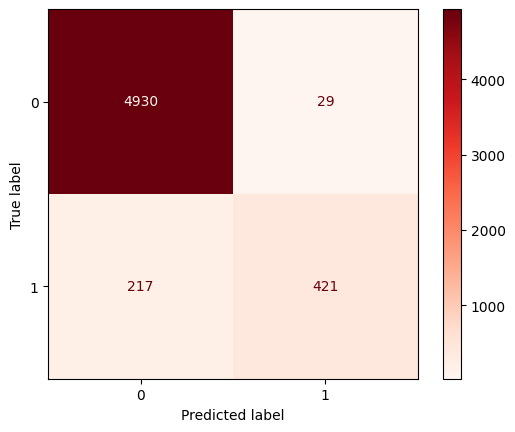

In [86]:
# Menampilkan Classification Report
print('Train')
target = ['Dangerous', 'Safe']
print(classification_report(y_train, y_pred_train, target_names=target))
print('')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_SVC, X_train_new, y_train, cmap='Reds'))

In [87]:
# List of different cv values to try
cv_values = [3, 4, 5, 6, 7]
results = {}

# Evaluate cross-validation for different values of cv
for cv in cv_values:
    f1_train_cross_val = cross_val_score(pipe_SVC,
                                         X_train_new,
                                         y_train,
                                         cv=cv,
                                         scoring="f1")
    results[cv] = f1_train_cross_val
    print(f'F1 Score - All - Cross Validation (cv={cv})  : ', f1_train_cross_val)
    print(f'F1 Score - Mean - Cross Validation (cv={cv}) : ', f1_train_cross_val.mean())
    print(f'F1 Score - Std - Cross Validation (cv={cv})  : ', f1_train_cross_val.std())
    print(f'F1 Score - Range of Test-Set (cv={cv})       : ', (f1_train_cross_val.mean() - f1_train_cross_val.std()), '-', (f1_train_cross_val.mean() + f1_train_cross_val.std()))
    print('-' * 50)

# Find the best cv value based on mean F1 Score
best_cv_mean = max(results, key=lambda cv: results[cv].mean())
best_f1_mean = results[best_cv_mean].mean()

# Find the best cv value based on the lowest std of F1 Score
best_cv_std = min(results, key=lambda cv: results[cv].std())
best_f1_std = results[best_cv_std].std()

print(f'The best cv value is {best_cv_mean} with a mean F1 Score of {best_f1_mean}')
print(f'The best cv value is {best_cv_std} with the lowest standard deviation of F1 Score: {best_f1_std}')


F1 Score - All - Cross Validation (cv=3)  :  [0.73888889 0.71590909 0.68965517]
F1 Score - Mean - Cross Validation (cv=3) :  0.7148177174039243
F1 Score - Std - Cross Validation (cv=3)  :  0.020114390065876786
F1 Score - Range of Test-Set (cv=3)       :  0.6947033273380475 - 0.7349321074698011
--------------------------------------------------
F1 Score - All - Cross Validation (cv=4)  :  [0.74820144 0.72180451 0.73134328 0.67910448]
F1 Score - Mean - Cross Validation (cv=4) :  0.7201134278302865
F1 Score - Std - Cross Validation (cv=4)  :  0.02549333140464297
F1 Score - Range of Test-Set (cv=4)       :  0.6946200964256436 - 0.7456067592349295
--------------------------------------------------
F1 Score - All - Cross Validation (cv=5)  :  [0.74885845 0.74208145 0.71428571 0.69856459 0.7014218 ]
F1 Score - Mean - Cross Validation (cv=5) :  0.7210424007974805
F1 Score - Std - Cross Validation (cv=5)  :  0.020747272303098137
F1 Score - Range of Test-Set (cv=5)       :  0.7002951284943824 - 

Test
              precision    recall  f1-score   support

   Dangerous       0.95      0.99      0.97      2125
        Safe       0.91      0.61      0.73       274

    accuracy                           0.95      2399
   macro avg       0.93      0.80      0.85      2399
weighted avg       0.95      0.95      0.94      2399


Confusion Matrix      : 


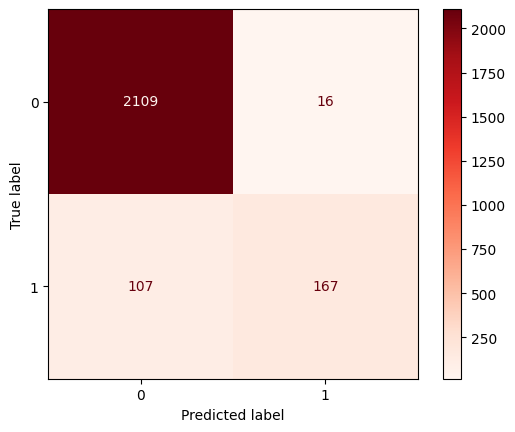

In [88]:
# Menampilkan Classification Report
print('Test')
target = ['Dangerous', 'Safe']
print(classification_report(y_test, y_pred_test, target_names=target))
print('')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_SVC, X_test_new, y_test, cmap='Reds'))

In [89]:
all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Support Vector Machine (SVM)')
reports = pd.DataFrame(all_reports)
reports

,K-Nearest Neighbors (KNN),Support Vector Machine (SVM)
train - precision,0.887734,0.935556
train - recall,0.669279,0.659875
train - accuracy_score,0.952653,0.956048
train - f1_score,0.763181,0.773897
test - precision,0.748815,0.912568
test - recall,0.576642,0.609489
test - accuracy_score,0.929554,0.948729
test - f1_score,0.651546,0.730853


***Insight:*** 

- Berdasarkan metrik evaluasi dari model klasifikasi SVM, hasil prediksinya dapat disimpulkan sebagai berikut:

    1. Berdasarkan F1-Score:

        - Untuk kelas **Dangerous**, F1-Score sebesar 0.97, yang artinya sekitar 97% dari semua prediksi yang dibuat untuk kelas ini adalah benar.

        - Untuk kelas **Safe**, F1-Score sebesar 0.73, yang artinya sekitar 73% dari semua prediksi yang dibuat untuk kelas ini adalah benar.

    2. Berdasarkan Akurasi:

        - Dengan nilai akurasi sebesar 0.95, dapat disimpulkan bahwa model ini akan memprediksi apakah air aman atau tidak aman dengan tingkat ketepatan sebesar 95%.

- Selain itu, dilakukan percobaan *cross-validation* dengan lipatan (cv) antara 3 hingga 7 untuk menentukan *cross-validation* mana yang memberikan pengaruh terbaik dari sudut pandang rata-rata (mean) dan standar deviasi (std) berdasarkan F1-Score. Hasil analisis menunjukkan bahwa:

    - Nilai lipatan terbaik (cv) adalah 7, yang menunjukkan performa rata-rata terbaik.

    - Nilai lipatan terbaik (cv) adalah 3, yang menunjukkan standar deviasi terendah dan kinerja yang paling konsisten.

    Oleh karena itu, jika nantinya akan menggunakan *hyperparameter*, nilai lipatan *cross-validation* sebesar 3 atau 7 akan dipertimbangkan.

---

### ***Decision Tree***

---

In [90]:
# Memeriksa Kinerja Model
y_pred_train = pipe_DT.predict(X_train_new)
y_pred_test = pipe_DT.predict(X_test_new)

Train
              precision    recall  f1-score   support

   Dangerous       1.00      1.00      1.00      4959
        Safe       1.00      1.00      1.00       638

    accuracy                           1.00      5597
   macro avg       1.00      1.00      1.00      5597
weighted avg       1.00      1.00      1.00      5597


Confusion Matrix      : 


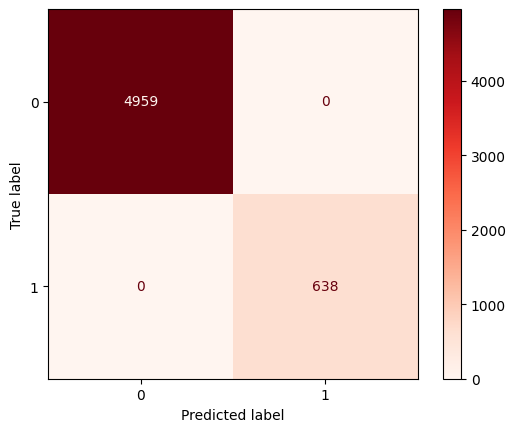

In [91]:
# Menampilkan Classification Report
print('Train')
target = ['Dangerous', 'Safe']
print(classification_report(y_train, y_pred_train, target_names=target))
print('')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_DT, X_train_new, y_train, cmap='Reds'))

In [92]:
# List of different cv values to try
cv_values = [3, 4, 5, 6, 7]
results = {}

# Evaluate cross-validation for different values of cv
for cv in cv_values:
    f1_train_cross_val = cross_val_score(pipe_DT,
                                         X_train_new,
                                         y_train,
                                         cv=cv,
                                         scoring="f1")
    results[cv] = f1_train_cross_val
    print(f'F1 Score - All - Cross Validation (cv={cv})  : ', f1_train_cross_val)
    print(f'F1 Score - Mean - Cross Validation (cv={cv}) : ', f1_train_cross_val.mean())
    print(f'F1 Score - Std - Cross Validation (cv={cv})  : ', f1_train_cross_val.std())
    print(f'F1 Score - Range of Test-Set (cv={cv})       : ', (f1_train_cross_val.mean() - f1_train_cross_val.std()), '-', (f1_train_cross_val.mean() + f1_train_cross_val.std()))
    print('-' * 50)

# Find the best cv value based on mean F1 Score
best_cv_mean = max(results, key=lambda cv: results[cv].mean())
best_f1_mean = results[best_cv_mean].mean()

# Find the best cv value based on the lowest std of F1 Score
best_cv_std = min(results, key=lambda cv: results[cv].std())
best_f1_std = results[best_cv_std].std()

print(f'The best cv value is {best_cv_mean} with a mean F1 Score of {best_f1_mean}')
print(f'The best cv value is {best_cv_std} with the lowest standard deviation of F1 Score: {best_f1_std}')


F1 Score - All - Cross Validation (cv=3)  :  [0.71226415 0.7606264  0.70776256]
F1 Score - Mean - Cross Validation (cv=3) :  0.7268843687437708
F1 Score - Std - Cross Validation (cv=3)  :  0.023929890670076382
F1 Score - Range of Test-Set (cv=3)       :  0.7029544780736945 - 0.7508142594138472
--------------------------------------------------
F1 Score - All - Cross Validation (cv=4)  :  [0.73394495 0.76190476 0.75163399 0.73652695]
F1 Score - Mean - Cross Validation (cv=4) :  0.7460026622672729
F1 Score - Std - Cross Validation (cv=4)  :  0.011399189802490077
F1 Score - Range of Test-Set (cv=4)       :  0.7346034724647827 - 0.757401852069763
--------------------------------------------------
F1 Score - All - Cross Validation (cv=5)  :  [0.78571429 0.74524715 0.7265625  0.70355731 0.78461538]
F1 Score - Mean - Cross Validation (cv=5) :  0.7491393261743216
F1 Score - Std - Cross Validation (cv=5)  :  0.03224549739044895
F1 Score - Range of Test-Set (cv=5)       :  0.7168938287838726 - 0

Test
              precision    recall  f1-score   support

   Dangerous       0.97      0.96      0.97      2125
        Safe       0.73      0.77      0.75       274

    accuracy                           0.94      2399
   macro avg       0.85      0.87      0.86      2399
weighted avg       0.94      0.94      0.94      2399


Confusion Matrix      : 


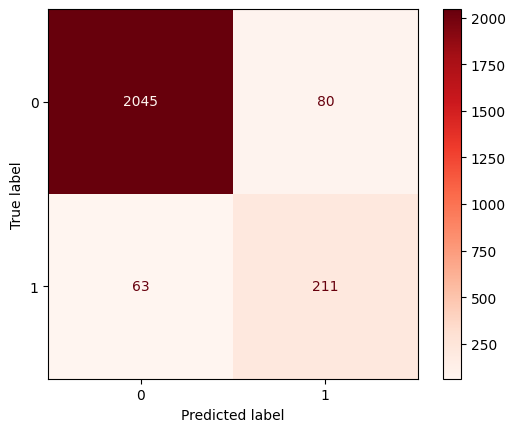

In [93]:
# Menampilkan Classification Report
print('Test')
target = ['Dangerous', 'Safe']
print(classification_report(y_test, y_pred_test, target_names=target))
print('')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_DT, X_test_new, y_test, cmap='Reds'))

In [94]:
all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Decision Tree')
reports = pd.DataFrame(all_reports)
reports

,K-Nearest Neighbors (KNN),Support Vector Machine (SVM),Decision Tree
train - precision,0.887734,0.935556,1.000000
train - recall,0.669279,0.659875,1.000000
train - accuracy_score,0.952653,0.956048,1.000000
train - f1_score,0.763181,0.773897,1.000000
test - precision,0.748815,0.912568,0.725086
test - recall,0.576642,0.609489,0.770073
test - accuracy_score,0.929554,0.948729,0.940392
test - f1_score,0.651546,0.730853,0.746903


***Insight:*** 

- Berdasarkan metrik evaluasi dari model klasifikasi Decicion Tree, hasil prediksinya dapat disimpulkan sebagai berikut:

    1. Berdasarkan F1-Score:

        - Untuk kelas **Dangerous**, F1-Score sebesar 0.97, yang artinya sekitar 97% dari semua prediksi yang dibuat untuk kelas ini adalah benar.

        - Untuk kelas **Safe**, F1-Score sebesar 0.78, yang artinya sekitar 78% dari semua prediksi yang dibuat untuk kelas ini adalah benar.

    2. Berdasarkan Akurasi:

        - Dengan nilai akurasi sebesar 0.95, dapat disimpulkan bahwa model ini akan memprediksi apakah air aman atau tidak aman dengan tingkat ketepatan sebesar 95%.

- Selain itu, dilakukan percobaan *cross-validation* dengan lipatan (cv) antara 3 hingga 7 untuk menentukan *cross-validation* mana yang memberikan pengaruh terbaik dari sudut pandang rata-rata (mean) dan standar deviasi (std) berdasarkan F1-Score. Hasil analisis menunjukkan bahwa:

    - Nilai lipatan terbaik (cv) adalah 6, yang menunjukkan performa rata-rata terbaik.

    - Nilai lipatan terbaik (cv) adalah 6, yang menunjukkan standar deviasi terendah dan kinerja yang paling konsisten.

    Oleh karena itu, jika nantinya akan menggunakan *hyperparameter*, nilai lipatan *cross-validation* sebesar 6 akan dipertimbangkan.

---

### ***Random Forest***

---

In [95]:
# Memeriksa Kinerja Model
y_pred_train = pipe_RF.predict(X_train_new)
y_pred_test = pipe_RF.predict(X_test_new)

Train
              precision    recall  f1-score   support

   Dangerous       1.00      1.00      1.00      4959
        Safe       1.00      1.00      1.00       638

    accuracy                           1.00      5597
   macro avg       1.00      1.00      1.00      5597
weighted avg       1.00      1.00      1.00      5597


Confusion Matrix      : 


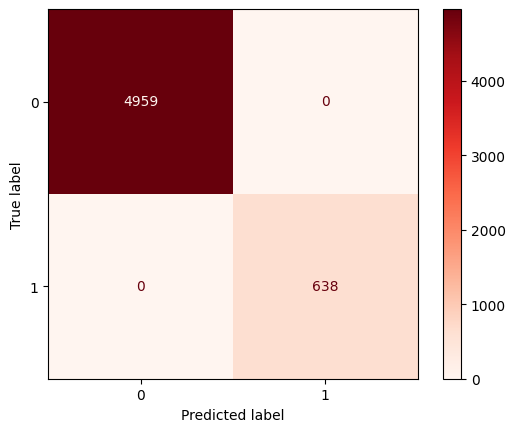

In [96]:
# Menampilkan Classification Report
print('Train')
target = ['Dangerous', 'Safe']
print(classification_report(y_train, y_pred_train, target_names=target))
print('')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_RF, X_train_new, y_train, cmap='Reds'))

In [97]:
# List of different cv values to try
cv_values = [3, 4, 5, 6, 7]
results = {}

# Evaluate cross-validation for different values of cv
for cv in cv_values:
    f1_train_cross_val = cross_val_score(pipe_RF,
                                         X_train_new,
                                         y_train,
                                         cv=cv,
                                         scoring="f1")
    results[cv] = f1_train_cross_val
    print(f'F1 Score - All - Cross Validation (cv={cv})  : ', f1_train_cross_val)
    print(f'F1 Score - Mean - Cross Validation (cv={cv}) : ', f1_train_cross_val.mean())
    print(f'F1 Score - Std - Cross Validation (cv={cv})  : ', f1_train_cross_val.std())
    print(f'F1 Score - Range of Test-Set (cv={cv})       : ', (f1_train_cross_val.mean() - f1_train_cross_val.std()), '-', (f1_train_cross_val.mean() + f1_train_cross_val.std()))
    print('-' * 50)

# Find the best cv value based on mean F1 Score
best_cv_mean = max(results, key=lambda cv: results[cv].mean())
best_f1_mean = results[best_cv_mean].mean()

# Find the best cv value based on the lowest std of F1 Score
best_cv_std = min(results, key=lambda cv: results[cv].std())
best_f1_std = results[best_cv_std].std()

print(f'The best cv value is {best_cv_mean} with a mean F1 Score of {best_f1_mean}')
print(f'The best cv value is {best_cv_std} with the lowest standard deviation of F1 Score: {best_f1_std}')


F1 Score - All - Cross Validation (cv=3)  :  [0.76923077 0.75068493 0.73295455]
F1 Score - Mean - Cross Validation (cv=3) :  0.7509567487307214
F1 Score - Std - Cross Validation (cv=3)  :  0.014810953521365248
F1 Score - Range of Test-Set (cv=3)       :  0.7361457952093561 - 0.7657677022520867
--------------------------------------------------
F1 Score - All - Cross Validation (cv=4)  :  [0.76978417 0.76923077 0.75       0.73333333]
F1 Score - Mean - Cross Validation (cv=4) :  0.7555870688064933
F1 Score - Std - Cross Validation (cv=4)  :  0.01511747663720392
F1 Score - Range of Test-Set (cv=4)       :  0.7404695921692894 - 0.7707045454436972
--------------------------------------------------
F1 Score - All - Cross Validation (cv=5)  :  [0.77209302 0.79279279 0.73972603 0.74074074 0.74545455]
F1 Score - Mean - Cross Validation (cv=5) :  0.7581614259282307
F1 Score - Std - Cross Validation (cv=5)  :  0.0209677370155946
F1 Score - Range of Test-Set (cv=5)       :  0.737193688912636 - 0.7

Test
              precision    recall  f1-score   support

   Dangerous       0.97      0.99      0.98      2125
        Safe       0.92      0.73      0.81       274

    accuracy                           0.96      2399
   macro avg       0.94      0.86      0.90      2399
weighted avg       0.96      0.96      0.96      2399


Confusion Matrix      : 


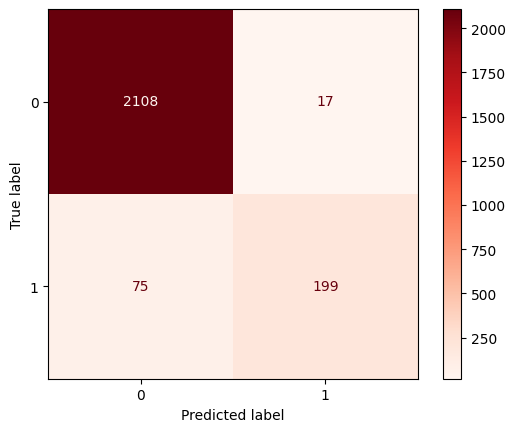

In [98]:
# Menampilkan Classification Report
print('Test')
target = ['Dangerous', 'Safe']
print(classification_report(y_test, y_pred_test, target_names=target))
print('')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_RF, X_test_new, y_test, cmap='Reds'))

In [99]:
all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Random Forest')
reports = pd.DataFrame(all_reports)
reports

,K-Nearest Neighbors (KNN),Support Vector Machine (SVM),Decision Tree,Random Forest
train - precision,0.887734,0.935556,1.000000,1.000000
train - recall,0.669279,0.659875,1.000000,1.000000
train - accuracy_score,0.952653,0.956048,1.000000,1.000000
train - f1_score,0.763181,0.773897,1.000000,1.000000
test - precision,0.748815,0.912568,0.725086,0.921296
test - recall,0.576642,0.609489,0.770073,0.726277
test - accuracy_score,0.929554,0.948729,0.940392,0.961651
test - f1_score,0.651546,0.730853,0.746903,0.812245


***Insight:*** 

- Berdasarkan metrik evaluasi dari model klasifikasi Random Forest, hasil prediksinya dapat disimpulkan sebagai berikut:

    1. Berdasarkan F1-Score:

        - Untuk kelas **Dangerous**, F1-Score sebesar 0.98, yang artinya sekitar 98% dari semua prediksi yang dibuat untuk kelas ini adalah benar.

        - Untuk kelas **Safe**, F1-Score sebesar 0.82, yang artinya sekitar 82% dari semua prediksi yang dibuat untuk kelas ini adalah benar.

    2. Berdasarkan Akurasi:

        - Dengan nilai akurasi sebesar 0.96, dapat disimpulkan bahwa model ini akan memprediksi apakah air aman atau tidak aman dengan tingkat ketepatan sebesar 96%.

- Selain itu, dilakukan percobaan *cross-validation* dengan lipatan (cv) antara 3 hingga 7 untuk menentukan *cross-validation* mana yang memberikan pengaruh terbaik dari sudut pandang rata-rata (mean) dan standar deviasi (std) berdasarkan F1-Score. Hasil analisis menunjukkan bahwa:

    - Nilai lipatan terbaik (cv) adalah 5, yang menunjukkan performa rata-rata terbaik.

    - Nilai lipatan terbaik (cv) adalah 3, yang menunjukkan standar deviasi terendah dan kinerja yang paling konsisten.

    Oleh karena itu, jika nantinya akan menggunakan *hyperparameter*, nilai lipatan *cross-validation* sebesar 3 atau 5 akan dipertimbangkan.

---

### ***XGBoost***

---

In [100]:
# Memeriksa Kinerja Model
y_pred_train = pipe_XGB.predict(X_train_new)
y_pred_test = pipe_XGB.predict(X_test_new)

Train
              precision    recall  f1-score   support

   Dangerous       1.00      1.00      1.00      4959
        Safe       1.00      1.00      1.00       638

    accuracy                           1.00      5597
   macro avg       1.00      1.00      1.00      5597
weighted avg       1.00      1.00      1.00      5597


Confusion Matrix      : 


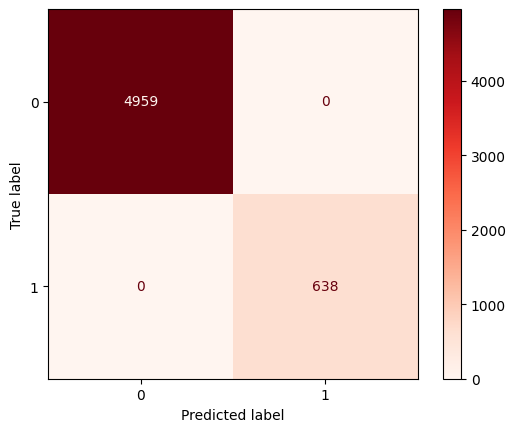

In [101]:
# Menampilkan Classification Report
print('Train')
target = ['Dangerous', 'Safe']
print(classification_report(y_train, y_pred_train, target_names=target))
print('')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_XGB, X_train_new, y_train, cmap='Reds'))

In [102]:
# List of different cv values to try
cv_values = [3, 4, 5, 6, 7]
results = {}

# Evaluate cross-validation for different values of cv
for cv in cv_values:
    f1_train_cross_val = cross_val_score(pipe_XGB,
                                         X_train_new,
                                         y_train,
                                         cv=cv,
                                         scoring="f1")
    results[cv] = f1_train_cross_val
    print(f'F1 Score - All - Cross Validation (cv={cv})  : ', f1_train_cross_val)
    print(f'F1 Score - Mean - Cross Validation (cv={cv}) : ', f1_train_cross_val.mean())
    print(f'F1 Score - Std - Cross Validation (cv={cv})  : ', f1_train_cross_val.std())
    print(f'F1 Score - Range of Test-Set (cv={cv})       : ', (f1_train_cross_val.mean() - f1_train_cross_val.std()), '-', (f1_train_cross_val.mean() + f1_train_cross_val.std()))
    print('-' * 50)

# Find the best cv value based on mean F1 Score
best_cv_mean = max(results, key=lambda cv: results[cv].mean())
best_f1_mean = results[best_cv_mean].mean()

# Find the best cv value based on the lowest std of F1 Score
best_cv_std = min(results, key=lambda cv: results[cv].std())
best_f1_std = results[best_cv_std].std()

print(f'The best cv value is {best_cv_mean} with a mean F1 Score of {best_f1_mean}')
print(f'The best cv value is {best_cv_std} with the lowest standard deviation of F1 Score: {best_f1_std}')


F1 Score - All - Cross Validation (cv=3)  :  [0.8        0.81885856 0.80208333]
F1 Score - Mean - Cross Validation (cv=3) :  0.8069806313757927
F1 Score - Std - Cross Validation (cv=3)  :  0.008441918221714605
F1 Score - Range of Test-Set (cv=3)       :  0.7985387131540781 - 0.8154225495975073
--------------------------------------------------
F1 Score - All - Cross Validation (cv=4)  :  [0.80677966 0.83276451 0.82154882 0.83501684]
F1 Score - Mean - Cross Validation (cv=4) :  0.8240274556755149
F1 Score - Std - Cross Validation (cv=4)  :  0.01118852692506171
F1 Score - Range of Test-Set (cv=4)       :  0.8128389287504533 - 0.8352159826005766
--------------------------------------------------
F1 Score - All - Cross Validation (cv=5)  :  [0.81545064 0.8244898  0.81702128 0.82700422 0.83193277]
F1 Score - Mean - Cross Validation (cv=5) :  0.8231797417618925
F1 Score - Std - Cross Validation (cv=5)  :  0.006174529582104908
F1 Score - Range of Test-Set (cv=5)       :  0.8170052121797875 - 

Test
              precision    recall  f1-score   support

   Dangerous       0.98      0.99      0.98      2125
        Safe       0.90      0.81      0.85       274

    accuracy                           0.97      2399
   macro avg       0.94      0.90      0.92      2399
weighted avg       0.97      0.97      0.97      2399


Confusion Matrix      : 


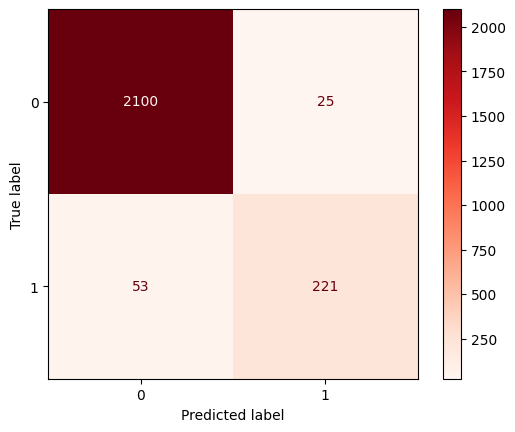

In [103]:
# Menampilkan Classification Report
print('Test')
target = ['Dangerous', 'Safe']
print(classification_report(y_test, y_pred_test, target_names=target))
print('')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_XGB, X_test_new, y_test, cmap='Reds'))

In [104]:
all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'XGBoost')
reports = pd.DataFrame(all_reports)
reports

,K-Nearest Neighbors (KNN),Support Vector Machine (SVM),Decision Tree,Random Forest,XGBoost
train - precision,0.887734,0.935556,1.000000,1.000000,1.000000
train - recall,0.669279,0.659875,1.000000,1.000000,1.000000
train - accuracy_score,0.952653,0.956048,1.000000,1.000000,1.000000
train - f1_score,0.763181,0.773897,1.000000,1.000000,1.000000
test - precision,0.748815,0.912568,0.725086,0.921296,0.898374
test - recall,0.576642,0.609489,0.770073,0.726277,0.806569
test - accuracy_score,0.929554,0.948729,0.940392,0.961651,0.967486
test - f1_score,0.651546,0.730853,0.746903,0.812245,0.850000


***Insight:*** 

- Berdasarkan metrik evaluasi dari model klasifikasi XGBoost, hasil prediksinya dapat disimpulkan sebagai berikut:

    1. Berdasarkan F1-Score:

        - Untuk kelas **Dangerous**, F1-Score sebesar 0.98, yang artinya sekitar 98% dari semua prediksi yang dibuat untuk kelas ini adalah benar.

        - Untuk kelas **Safe**, F1-Score sebesar 0.85, yang artinya sekitar 85% dari semua prediksi yang dibuat untuk kelas ini adalah benar.

    2. Berdasarkan Akurasi:

        - Dengan nilai akurasi sebesar 0.97, dapat disimpulkan bahwa model ini akan memprediksi apakah air aman atau tidak aman dengan tingkat ketepatan sebesar 97%.

- Selain itu, dilakukan percobaan *cross-validation* dengan lipatan (cv) antara 3 hingga 7 untuk menentukan *cross-validation* mana yang memberikan pengaruh terbaik dari sudut pandang rata-rata (mean) dan standar deviasi (std) berdasarkan F1-Score. Hasil analisis menunjukkan bahwa:

    - Nilai lipatan terbaik (cv) adalah 7, yang menunjukkan performa rata-rata terbaik.

    - Nilai lipatan terbaik (cv) adalah 5, yang menunjukkan standar deviasi terendah dan kinerja yang paling konsisten.

    Oleh karena itu, jika nantinya akan menggunakan *hyperparameter*, nilai lipatan *cross-validation* sebesar 5 atau 7 akan dipertimbangkan.

---

### ***Hyperparameter Model***

---

In [105]:
# Pipeline KNN classifier
pipe_hyperparameter_KNN = Pipeline([
    ('scaler', scaler),
    ('knn', KNeighborsClassifier())
])

# Tuning Paramameter
param_grid = {
    'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan'],
}

# Model GridSearchCV
grid_KNN = GridSearchCV(pipe_hyperparameter_KNN, param_grid=param_grid, cv=5)

In [106]:
# Fit pada KNN
grid_KNN.fit(X_train_new, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
                         'knn__weights': ['uniform', 'distance']})

In [107]:
# Get the best parameters and best score
best_params = grid_KNN.best_params_
best_score = grid_KNN.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the model with best parameters
best_model = grid_KNN.best_estimator_
y_pred = best_model.predict(X_test_new)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Best Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}
Best Score: 0.9372866398570153
Test Accuracy: 0.9399749895789913


In [108]:
# Memeriksa Kinerja Model
y_pred_train = grid_KNN.predict(X_train_new)
y_pred_test = grid_KNN.predict(X_test_new)

Train
              precision    recall  f1-score   support

   Dangerous       0.95      0.99      0.97      4959
        Safe       0.90      0.61      0.73       638

    accuracy                           0.95      5597
   macro avg       0.93      0.80      0.85      5597
weighted avg       0.95      0.95      0.94      5597


Confusion Matrix      : 


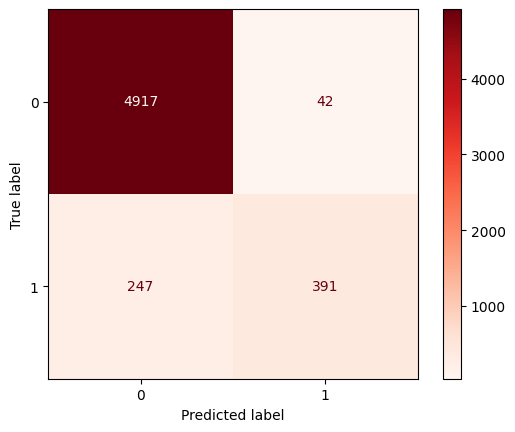

In [109]:
# Menampilkan Classification Report
print('Train')
print(classification_report(y_train, y_pred_train, target_names=target))
print('')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(grid_KNN, X_train_new, y_train, cmap='Reds'))

Test
              precision    recall  f1-score   support

   Dangerous       0.95      0.99      0.97      2125
        Safe       0.87      0.56      0.68       274

    accuracy                           0.94      2399
   macro avg       0.91      0.78      0.82      2399
weighted avg       0.94      0.94      0.93      2399


Confusion Matrix      : 


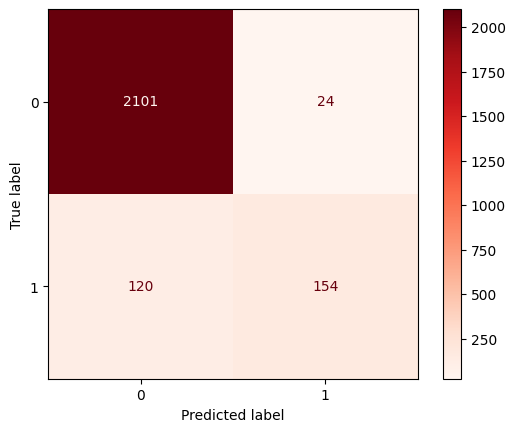

In [110]:
# Menampilkan Classification Report
print('Test')
target = ['Dangerous', 'Safe']
print(classification_report(y_test, y_pred_test, target_names=target))
print('')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(grid_KNN, X_test_new, y_test, cmap='Reds'))

In [111]:
all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'KNN Hyperparameter')
reports = pd.DataFrame(all_reports)
reports

,K-Nearest Neighbors (KNN),Support Vector Machine (SVM),Decision Tree,Random Forest,XGBoost,KNN Hyperparameter
train - precision,0.887734,0.935556,1.000000,1.000000,1.000000,0.903002
train - recall,0.669279,0.659875,1.000000,1.000000,1.000000,0.612853
train - accuracy_score,0.952653,0.956048,1.000000,1.000000,1.000000,0.948365
train - f1_score,0.763181,0.773897,1.000000,1.000000,1.000000,0.730159
test - precision,0.748815,0.912568,0.725086,0.921296,0.898374,0.865169
test - recall,0.576642,0.609489,0.770073,0.726277,0.806569,0.562044
test - accuracy_score,0.929554,0.948729,0.940392,0.961651,0.967486,0.939975
test - f1_score,0.651546,0.730853,0.746903,0.812245,0.850000,0.681416


***Insight:***

- *Hyperparameter tuning* telah dilakukan untuk model KNN *Hyperparemeter*, di mana beberapa parameter yang diatur meliputi:

    - Neighbors

    - Weights

    - Metric

-  Selain itu, setelah dilakukan analisis menggunakan *cross-validation* dengan nilai lipatan sebesar 4, hasil prediksi dari model klasifikasi KNN dapat disimpulkan sebagai berikut:

    1. Berdasarkan F1-Score:
    
        - Untuk kelas **Dangerous**, F1-Score sebesar 0.97, yang berarti sekitar 97% dari semua prediksi yang dibuat untuk kelas ini adalah benar.

        - Untuk kelas **Safe**, F1-Score sebesar 0.68, yang berarti sekitar 68% dari semua prediksi yang dibuat untuk kelas ini adalah benar.

    2. Berdasarkan Akurasi:
    
        - Dengan nilai akurasi sebesar 0.94, dapat disimpulkan bahwa model ini akan memprediksi apakah air aman atau tidak aman dengan tingkat ketepatan sebesar 94%.

- Pada model *KNN Hyperparameter* yang telah menggunakan *cross-validation* (CV) dapat mempengaruhi performa jika tidak dioptimalkan dengan baik seperti pengaruh ukuran lipatan, terlalu sedikit lipatan (misalnya, cv=2 atau cv=3) mungkin tidak memberikan evaluasi yang stabil, sedangkan terlalu banyak lipatan (misalnya, cv=20) mungkin menyebabkan peningkatan waktu komputasi tanpa peningkatan signifikan dalam stabilitas hasil. Sehingga pada kasus ini dilakukan uji coba menggunakan cv=3 sampai cv=7 untuk mendapatkan performa terbaik. Parameter yang bisa menjadi acuan adalah dengan menggunakan rata-rata dan standar deviasi sepeti penjelasan menggunakan contoh berikut. Katakan jika nilai CV terbaik menggunakan rata-rata adalah 7 dan menggunaka standar deviasi adalah 4 sehingga:

    - Pertama, nilai lipatan terbaik (cv) adalah 7, yang menunjukkan performa rata-rata terbaik. Hal ini berarti bahwa dengan menggunakan 7 lipatan pada proses cross-validation, model menghasilkan kinerja yang paling baik secara keseluruhan. Performa rata-rata yang tinggi menunjukkan bahwa model memiliki kemampuan yang baik untuk memprediksi target dengan akurasi yang tinggi.

    - Kedua, meskipun demikian, nilai lipatan terbaik (cv) adalah 4. Ini menunjukkan bahwa meskipun performa rata-rata mungkin tidak sebaik saat menggunakan 7 lipatan, namun standar deviasi yang terendah menunjukkan bahwa model memiliki konsistensi yang baik dalam melakukan prediksi. Dengan kata lain, hasil prediksi dari model tidak bervariasi secara signifikan antara setiap lipatan cross-validation. Hal ini menunjukkan bahwa model lebih stabil dan dapat diandalkan dalam memprediksi target, meskipun mungkin tidak memiliki performa rata-rata yang sebaik ketika menggunakan 7 lipatan.

---

### ***Model Comparison***

---

In [112]:
# Melakukan Fit pada RobustScaler
scaler.fit(X_train_new)

# Mendefinisikan Model dan Metric
models = {
    'K-Nearest Neighbors (KNN)': pipe_KNN,
    'Support Vector Machine (SVM)': pipe_SVC,
    'Decision Tree': pipe_DT,
    'Random Forest': pipe_RF,
    'XGBoost': pipe_XGB,
    'KNN Hyperparameter': grid_KNN,
}

metrics = {
    'Accuracy': accuracy_score,
    'F1-Score': f1_score,
}

# Melakukan Fit Setiap Model pada Data Training
for model_name, model in models.items():
    model.fit(X_train_new, y_train)

# Membuat Dataframe untuk Hasil
df_model = pd.DataFrame(columns=models.keys(), 
                        index=['Accuracy Train', 'Accuracy Test', 'F1-Score Train', 'F1-Score Test'])

# Evaluasi Model untuk Setiap Metrik
for metric_name, metric_func in metrics.items():
    for model_name, model in models.items():
        # Evaluasi pada Data Train
        y_train_pred = model.predict(X_train_new)
        train_metric_value = metric_func(y_train, y_train_pred)
        
        # Evaluasi pada Data Test
        y_test_pred = model.predict(X_test_new)
        test_metric_value = metric_func(y_test, y_test_pred)
        
        # Memasukkan nilai ke DataFrame
        df_model.loc[f'{metric_name} Train', model_name] = train_metric_value
        df_model.loc[f'{metric_name} Test', model_name] = test_metric_value

In [113]:
# Menampilkan Hasil Perbandingan Tiap Model
df_model

,K-Nearest Neighbors (KNN),Support Vector Machine (SVM),Decision Tree,Random Forest,XGBoost,KNN Hyperparameter
Accuracy Train,0.952653,0.956048,1.0,1.0,1.0,0.948365
Accuracy Test,0.929554,0.948729,0.939975,0.962484,0.967486,0.939975
F1-Score Train,0.763181,0.773897,1.0,1.0,1.0,0.730159
F1-Score Test,0.651546,0.730853,0.748252,0.814815,0.85,0.681416


***Insight:***

Untuk menentukan model terbaik, akan dilakukan perbandingan antara performa di setiap modelnya dengan pertimbangan:

- Akurasi dan F1-Score Terbaik: `XGBoost` konsisten menunjukkan performa terbaik pada akurasi dan F1-score uji.

- Overfitting: `SVM` menunjukkan *overfitting* paling rendah, diikuti oleh `KNN Hyperparameter`, dengan selisih train-test terkecil.

- Pemilihan Model: Jika Anda memprioritaskan performa uji, `XGBoost` adalah pilihan terbaik. Untuk meminimalkan *overfitting*, `SVM` atau `KNN Hyperparameter` lebih disarankan.

Karena `SVM` dan `KNN Hyperparameter` lebih disarankan, kemudian dibandingkan bedasarkan metrik yang diberikan sehingga diambil kesimpulan:

- `SVM` menunjukkan kinerja yang lebih baik dalam hal akurasi dan F1-score baik pada data pelatihan maupun pengujian.

- `SVM` juga menunjukkan sedikit lebih rendah tingkat *overfitting* dibandingkan KNN Hyperparameter, berdasarkan selisih *train-test* yang lebih kecil.


---

## ***Model Saving***

---

In [114]:
# Menyimpan File
with open('best_pipe.pkl', 'wb') as file_1: # wb = write binary
    pickle.dump(pipe_SVC, file_1)
with open('num_col.txt', 'w') as file_2: # wb = write binary
    json.dump(num_columns,file_2)

---

## ***Model Inference***

---

In [115]:
# Loading File
with open('best_pipe.pkl', 'rb') as file_1: # wb = write binary
    best_pipe = pickle.load(file_1)
with open('num_col.txt', 'r') as file_2: # wb = write binary
    num_col = json.load(file_2)

In [116]:
# Membuat Data Inference
df_inf = {
   'aluminium': np.random.uniform(0, 5, 10),
    'ammonia': np.random.uniform(0, 50, 10),
    'arsenic': np.random.uniform(0, 0.05, 10),
    'cadmium': np.random.uniform(0, 0.01, 10),
    'chloramine': np.random.uniform(0, 10, 10),
    'copper': np.random.uniform(0, 2, 10),
    'bacteria': np.random.uniform(0, 1000, 10),
    'viruses': np.random.uniform(0, 500, 10),
    'lead': np.random.uniform(0, 0.02, 10),
    'nitrites': np.random.uniform(0, 2, 10),
    'perchlorate': np.random.uniform(0, 100, 10),
    'radium': np.random.uniform(0, 10, 10),
    'selenium': np.random.uniform(0, 1, 10),
    'silver': np.random.uniform(0, 0.5, 10),
    'uranium': np.random.uniform(0, 0.5, 10)
}

df_inf = pd.DataFrame(df_inf)

In [117]:
# Menampilkan Data Inference
df_inf

,aluminium,ammonia,arsenic,cadmium,chloramine,copper,bacteria,viruses,lead,nitrites,perchlorate,radium,selenium,silver,uranium
0,0.113867,15.051632,0.003782,0.003839,4.425833,1.407621,515.178564,294.158882,0.003375,0.473755,4.038540,7.543376,0.610130,0.323862,0.372622
1,1.127584,15.523835,0.027357,0.002596,0.844188,1.614066,75.322643,243.494470,0.007495,0.942813,8.944072,3.787042,0.010968,0.264036,0.213346
2,4.699477,5.146353,0.020098,0.000795,7.720241,0.082917,151.944421,115.007039,0.001021,0.069827,75.874055,6.770634,0.171765,0.108154,0.222979
3,2.057709,40.453623,0.045552,0.002706,7.469067,0.598168,183.436494,123.708485,0.005540,0.148673,78.773988,9.264224,0.219323,0.172486,0.410039
4,1.532156,25.932526,0.048187,0.002562,0.608187,1.143234,820.621638,104.827258,0.002670,0.912270,29.182389,7.450504,0.207594,0.415437,0.155744
5,0.564600,14.137029,0.036159,0.001076,2.637614,1.900792,665.131146,303.502863,0.007528,0.100822,32.874754,3.108329,0.384929,0.099490,0.468089
6,0.917618,20.806914,0.049529,0.005543,1.943576,1.425096,158.717976,48.617588,0.015719,0.082452,62.694520,2.356763,0.891044,0.315334,0.183203
7,3.006335,8.849922,0.033746,0.004600,2.282944,1.284443,257.848573,39.524901,0.014632,0.016481,75.927984,5.701239,0.615949,0.247112,0.308434
8,4.248273,14.076109,0.020569,0.006341,1.029780,0.062856,648.711310,400.029210,0.018852,1.128425,34.394958,1.105463,0.889557,0.478852,0.198435
9,4.181809,3.246432,0.019472,0.003518,7.209686,0.328568,516.722019,328.838815,0.018731,0.372479,27.109868,0.369424,0.060027,0.486859,0.133042


In [118]:
# Memisahkan Kategori Kolom Kategori dan Numerical
df_inf_num = df_inf[num_col]

In [119]:
# Memprediksi Menggunakan Model Terbaik
y_pred_inf = best_pipe.predict(df_inf)

# Mengubah prediksi dari 0 dan 1 menjadi 'Dangerous' dan 'Safe'
y_pred_inf_label = ['Dangerous' if pred == 0 else 'Safe' for pred in y_pred_inf]

print('Rating:', y_pred_inf_label)

Rating: ['Dangerous', 'Dangerous', 'Dangerous', 'Dangerous', 'Dangerous', 'Dangerous', 'Dangerous', 'Dangerous', 'Dangerous', 'Dangerous']


***Insight:***

Telah berhasil dilakukan *inference* pada suatu dataset acak. Dari hasil analisis data tersebut, ditemukan kondisi air yang tidak aman

---

## **Kesimpulan**

---

### ***Exploratory Data Analysis***

---


Berdasarkan *exploratory data analysis*, sumber air ini diduga berasal dari beberapa sumber potensial berikut:

1. **Industri Berat dan Pertambangan Logam:**

    - Daerah ini kemungkinan merupakan area industri berat yang terkait dengan aktivitas pertambangan logam seperti seng, timah, atau tembaga.

    - Kegiatan industri berat seperti manufaktur logam, pengolahan limbah, atau produksi bahan kimia dapat menyebabkan pelepasan berbagai logam berat ke lingkungan sekitarnya.

2. **Infrastruktur Sanitasi yang Buruk:**

    - Infrastruktur sanitasi yang tidak memadai atau kurangnya fasilitas sanitasi yang layak dapat menyebabkan pencemaran air dengan bakteri, virus, dan senyawa kimia berbahaya.

    - Sistem pengolahan air limbah yang tidak efektif dapat mencemari sumber air permukaan dan air tanah.

3.  **Aktivitas Geologis Tinggi:**

    - Kemungkinan adanya aktivitas geologis yang tinggi seperti vulkanisme atau pembentukan batuan yang kaya akan mineral tertentu dapat menyebabkan air mengandung senyawa-senyawa beracun seperti arsenik, uranium, dan radium.

4.  **Dampak Limbah Pertambangan:**

    - Limbah pertambangan yang tidak terkelola dengan baik dapat mencemari air permukaan dan air tanah dengan logam-logam berat seperti cadmium, aluminium, dan selenium.

    - Proses pencucian atau limbah tailing dari pertambangan logam dapat meningkatkan risiko kontaminasi air di daerah sekitar.

5. **Kesehatan Masyarakat:**

    - Air yang tercemar dengan bakteri, virus, dan logam berat dapat menjadi sumber penyakit yang serius bagi masyarakat setempat.

    - Masalah pencemaran air yang ada memerlukan tindakan remediasi dan pengelolaan lingkungan yang ketat untuk melindungi kesehatan masyarakat dan menjaga keberlanjutan lingkungan.

---

### **Identifikasi Masalah**

---

Dalam peran sebagai data scientist, diperlukan berkomitmen untuk mengidentifikasi dan mengurangi konsentrasi 15 kontaminan utama dalam air, seperti aluminium, ammonia, dan arsenic, melalui analisis data mendalam dan penerapan teknologi pengolahan air yang canggih. Dengan target mengurangi setiap kontaminan hingga di bawah batas aman dalam waktu satu tahun, pengukuran bulanan akan memastikan kemajuan yang terperinci. Melalui penggunaan teknologi filtrasi terbaru, sensor kualitas air, dan algoritma machine learning, proses pengolahan air akan dioptimalkan untuk mencapai hasil yang diinginkan. Peningkatan kualitas air ini relevan untuk melindungi kesehatan masyarakat dan memastikan kepatuhan terhadap regulasi lingkungan, yang juga akan memperkuat reputasi perusahaan dalam keberlanjutan. Target ini akan dicapai dalam waktu 12 bulan, dengan evaluasi hasil setiap tiga bulan untuk memastikan perbaikan berkelanjutan dan penyesuaian strategi yang diperlukan.

---

### ***Model Evaluation***

---

Berdasarkan performa model yang digunakan yakni Support Vector Machine (SVM) ada beberapa masukan yang bisa diberikan:

1. Kelebihan:

    - Kemampuan menangani data non-linear saat menghadapi masalah kualitas air yang mungkin memiliki pola yang kompleks dan tidak linear.

    - Kemampuan menangani data berdimensi tinggiyang sering terjadi dalam analisis kualitas air di mana data dapat berasal dari berbagai sumber dan parameter yang berbeda.

    - Resisten terhadap *overfitting*

2. Kekurangan:

    - Membutuhkan waktu yang lama terlebih jika menggunakan kernel yang lebih kompleks

    - Tidak efisien untuk data yang besar 

    - Cenderung menangkap nilai 0 (Dangerous)

3. Saran untuk peningkatan:

    - Disarankan untuk menggunakan parameter C yang optimal

    - Gunakaan kernel yang lain seperti RBF, polynominal atau sigmoid

    - Jika menghadapi data yang besar, disarankan menggunakan PCA

    - Lebih memperbanyak data 
    
    - Melakukan *data balancing*

---



### ***Conseptual Problem***

---

#### **Pertanyaan**

---

1. Jelaskan latar belakang adanya *bagging* dan cara kerja *bagging* !

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma *boosting* yang Anda pilih !

3. Jelaskan apa yang dimaksud dengan *Cross Validation* !

---

#### **Jawaban**

---

1. *Bagging* adalah sebuah teknik dari *ensemble learning* yang digunakan untuk meningkatkan kinerja model prediksi dengan cara menggabungkan beberapa model prediksi yang dihasilkan dari subset data yang diambil secara acak dengan penggantian adapun proses *bagging* adalah dengan membuat sejumlah subset acak dari data pelatihan dengan penggantian. Setiap subset ini digunakan untuk melatih model prediksi yang sama secara independen. Kemudian, hasil prediksi dari setiap model diagregasikan, biasanya dengan mengambil rata-rata (untuk regresi) atau dengan melakukan pemungutan suara mayoritas (untuk klasifikasi). 

2. Random Forest adalah algoritma ensemble learning yang terdiri dari sejumlah besar pohon keputusan yang dibangun secara acak sementara SVM mencari hyperplane terbaik yang memisahkan kelas-kelas data.

3. *Cross Validation* adalah sebuah teknik validasi model yang digunakan untuk mengevaluasi kinerja model secara objektif dengan membagi data menjadi subset pelatihan dan subset pengujian. Proses ini dilakukan dengan mengulang proses pelatihan dan pengujian model pada beberapa kombinasi subset data yang berbeda. Tujuannya adalah untuk mengukur seberapa baik model akan berperforma pada data baru yang belum pernah dilihat sebelumnya.

---

### **Menyimpan File di CSV**

---

In [120]:
# Menggabungkan x_train dan x_test
concatenated_df = pd.concat([X_train_new, X_test_new], axis=0)

# Reset indeks
concatenated_df.reset_index(drop=True, inplace=True)
concatenated_df.tail(10)

,aluminium,ammonia,arsenic,cadmium,chloramine,copper,bacteria,viruses,lead,nitrites,perchlorate,radium,selenium,silver,uranium
7986,0.35,21.76,0.01,0.004,0.85,0.08,0.70,0.700,0.157,1.23,22.58,6.70,0.04,0.42,0.02
7987,0.98,13.74,0.01,0.001,0.19,1.50,0.82,0.820,0.053,1.24,8.65,6.98,0.05,0.15,0.07
7988,0.10,0.21,0.07,0.010,0.09,1.66,0.10,0.002,0.124,1.06,4.56,1.31,0.05,0.01,0.02
7989,0.98,7.05,0.04,0.004,7.34,0.84,0.00,0.000,0.074,1.42,31.54,6.56,0.07,0.12,0.05
7990,0.08,12.15,0.08,0.050,0.04,0.03,0.00,0.000,0.014,2.30,0.04,0.19,0.07,0.02,0.02
7991,0.05,14.03,0.02,0.004,6.64,1.54,0.26,0.006,0.200,1.87,58.63,4.76,0.09,0.06,0.04
7992,0.02,5.35,0.09,0.010,0.35,0.98,0.49,0.007,0.062,1.18,3.78,0.44,0.03,0.01,0.03
7993,0.05,3.46,0.03,0.060,0.17,0.90,0.00,0.002,0.135,0.93,0.25,5.16,0.04,0.05,0.04
7994,0.07,22.07,0.03,0.001,7.22,1.05,0.25,0.007,0.109,1.07,39.40,0.49,0.04,0.47,0.05
7995,0.09,19.07,0.34,0.030,6.68,0.29,0.70,0.700,0.136,2.19,33.25,3.09,0.02,0.38,0.02


In [121]:
# Menyimpan dataframe ke dalam file CSV
concatenated_df.to_csv('concatenated_data.csv', index=False)